# Weight Technique 1: Keyword Model Training

## Evaluation - Fine Tune Model usuing Keyword weights

In [1]:
import json
from google.cloud import aiplatform
from google.cloud.aiplatform.gapic.schema import predict
from google.protobuf import json_format
from google.protobuf.struct_pb2 import Value
from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate
from google.cloud import bigquery
from langchain_openai import ChatOpenAI
from langchain_experimental.sql import SQLDatabaseChain
from langchain.sql_database import SQLDatabase
from langchain.prompts import PromptTemplate
import warnings
warnings.filterwarnings('ignore')

In [2]:
openai_api_key = openai_api_key

In [3]:
# need to ask very specific questions to help the RAG model query the appropriate tables

### Keyword Extraction:
NLP Techniques: You can use various NLP techniques to extract keywords:

Frequency Analysis: Identify the most frequent words in the text.

Part-of-Speech Tagging: Identify nouns and adjectives, which are often good indicators of keywords.

Named Entity Recognition (NER): Identify entities like people, organizations, locations, and medical terms.

### Weight assignment on Keywords using TF-IDF Calculation
- Once you have a list of potential keywords, you can use TF-IDF to assign weights:

Term Frequency (TF): Calculate the frequency of each keyword in the text.

Inverse Document Frequency (IDF): Calculate the inverse document frequency of each keyword, which measures how unique it is across the entire dataset.

TF-IDF Score: Multiply TF and IDF to get the TF-IDF score for each keyword. Higher scores indicate more important keywords.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Connect to BigQuery
client = bigquery.Client()

# Query the database (replace with your actual query)
query = """
SELECT long_title
FROM `us-gcp-ame-con-5b680-sbx-1.mimic_iv_hosp_icu_dataset.d_icd_diagnoses`
WHERE long_title LIKE '%diagnosed%'
"""
query_job = client.query(query)
results = query_job.result()

# Extract text and clean it
texts = [row.long_title for row in results]
texts = [text.lower().replace('.', '').replace(',', '') for text in texts]

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the text data
vectorizer.fit(texts)

# Transform the text data into TF-IDF vectors
tfidf_matrix = vectorizer.transform(texts)

# Get the keywords and their TF-IDF scores
keywords = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()

# Print the keywords and their scores
for i, keyword in enumerate(keywords):
    print(f"{keyword}: {tfidf_scores[0][i]}")

cardiac: 0.5773502691896258
murmurs: 0.5773502691896258
undiagnosed: 0.5773502691896258


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Connect to BigQuery
client = bigquery.Client()

# Query the database (replace with your actual query)
query = """
SELECT long_title
FROM `us-gcp-ame-con-5b680-sbx-1.mimic_iv_hosp_icu_dataset.d_icd_diagnoses`
WHERE long_title LIKE '%cancer%'
"""
query_job = client.query(query)
results = query_job.result()

# Extract text and clean it
texts = [row.long_title for row in results]
texts = [text.lower().replace('.', '').replace(',', '') for text in texts]

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the text data
vectorizer.fit(texts)

# Transform the text data into TF-IDF vectors
tfidf_matrix = vectorizer.transform(texts)

# Get the keywords and their TF-IDF scores
keywords = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()

# Print the keywords and their scores
for i, keyword in enumerate(keywords):
    print(f"{keyword}: {tfidf_scores[0][i]}")

125: 0.7071067811865475
antigen: 0.35355339059327373
ca: 0.35355339059327373
cancer: 0.35355339059327373
elevated: 0.35355339059327373


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Connect to BigQuery
client = bigquery.Client()

# Query the database (replace with your actual query)
query = """
SELECT long_title
FROM `us-gcp-ame-con-5b680-sbx-1.mimic_iv_hosp_icu_dataset.d_icd_diagnoses`
WHERE long_title LIKE '%chronic pain%'
"""
query_job = client.query(query)
results = query_job.result()

# Extract text and clean it
texts = [row.long_title for row in results]
texts = [text.lower().replace('.', '').replace(',', '') for text in texts]

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the text data
vectorizer.fit(texts)

# Transform the text data into TF-IDF vectors
tfidf_matrix = vectorizer.transform(texts)

# Get the keywords and their TF-IDF scores
keywords = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()

# Print the keywords and their scores
for i, keyword in enumerate(keywords):
    print(f"{keyword}: {tfidf_scores[0][i]}")

chronic: 0.5773502691896258
other: 0.5773502691896258
pain: 0.5773502691896258


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Connect to BigQuery
client = bigquery.Client()

# Query the database (replace with your actual query)
query = """
SELECT long_title
FROM `us-gcp-ame-con-5b680-sbx-1.mimic_iv_hosp_icu_dataset.d_icd_diagnoses`
WHERE long_title LIKE '%tumor%'
"""
query_job = client.query(query)
results = query_job.result()

# Extract text and clean it
texts = [row.long_title for row in results]
texts = [text.lower().replace('.', '').replace(',', '') for text in texts]

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the text data
vectorizer.fit(texts)

# Transform the text data into TF-IDF vectors
tfidf_matrix = vectorizer.transform(texts)

# Get the keywords and their TF-IDF scores
keywords = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()

# Print the keywords and their scores
for i, keyword in enumerate(keywords):
    print(f"{keyword}: {tfidf_scores[0][i]}")

abdominal: 0.0
abnormal: 0.0
and: 0.0
appendix: 0.0
ascending: 0.0
associated: 0.0
axilla: 0.0
benign: 0.0
bone: 0.0
bronchus: 0.0
burkitt: 0.0
carcinoid: 0.0
cecum: 0.0
cell: 0.0
colon: 0.0
cysts: 0.0
deformans: 0.0
descending: 0.0
distant: 0.0
duodenum: 0.0
extranodal: 0.0
face: 0.0
foregut: 0.0
giant: 0.0
glaucoma: 0.0
head: 0.0
hindgut: 0.0
ileum: 0.0
inguinal: 0.0
intestine: 0.0
intra: 0.0
intrapelvic: 0.0
intrathoracic: 0.0
jejunum: 0.0
kidney: 0.0
large: 0.0
limb: 0.0
liver: 0.0
lower: 0.0
lung: 0.0
lymph: 0.0
lymphoma: 0.0
malignant: 0.0
markers: 0.0
mast: 0.0
mention: 0.0
midgut: 0.0
monkey: 0.5713913488374838
multiple: 0.0
neck: 0.0
neuroendocrine: 0.0
nodes: 0.0
not: 0.0
of: 0.0
or: 0.0
organ: 0.0
osteitis: 0.0
other: 0.0
otherwise: 0.0
peritoneum: 0.0
portion: 0.0
primary: 0.0
rectum: 0.0
region: 0.0
secondary: 0.0
sheath: 0.0
sigmoid: 0.0
site: 0.0
sites: 0.0
small: 0.0
solid: 0.0
specified: 0.0
spleen: 0.0
stomach: 0.0
tendon: 0.0
the: 0.0
thymus: 0.0
transverse: 0.0
tumo

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Connect to BigQuery
client = bigquery.Client()

# Query the database (replace with your actual query)
query = """
SELECT long_title
FROM `us-gcp-ame-con-5b680-sbx-1.mimic_iv_hosp_icu_dataset.d_icd_diagnoses`
WHERE long_title LIKE '%chemotherapy%'
"""
query_job = client.query(query)
results = query_job.result()

# Extract text and clean it
texts = [row.long_title for row in results]
texts = [text.lower().replace('.', '').replace(',', '') for text in texts]

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the text data
vectorizer.fit(texts)

# Transform the text data into TF-IDF vectors
tfidf_matrix = vectorizer.transform(texts)

# Get the keywords and their TF-IDF scores
keywords = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()

# Print the keywords and their scores
for i, keyword in enumerate(keywords):
    print(f"{keyword}: {tfidf_scores[0][i]}")

anemia: 0.6317450542765208
antineoplastic: 0.4804583972923858
chemotherapy: 0.3731188059313277
extravasation: 0.0
induced: 0.4804583972923858
of: 0.0
pancytopenia: 0.0
vesicant: 0.0


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Connect to BigQuery
client = bigquery.Client()

# Query the database (replace with your actual query)
query = """
SELECT long_title
FROM `us-gcp-ame-con-5b680-sbx-1.mimic_iv_hosp_icu_dataset.d_icd_diagnoses`
WHERE long_title LIKE '%remission%'
"""
query_job = client.query(query)
results = query_job.result()

# Extract text and clean it
texts = [row.long_title for row in results]
texts = [text.lower().replace('.', '').replace(',', '') for text in texts]

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the text data
vectorizer.fit(texts)

# Transform the text data into TF-IDF vectors
tfidf_matrix = vectorizer.transform(texts)

# Get the keywords and their TF-IDF scores
keywords = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()

# Print the keywords and their scores
for i, keyword in enumerate(keywords):
    print(f"{keyword}: {tfidf_scores[0][i]}")

abuse: 0.0
achieved: 0.33121896613728974
acting: 0.0
acute: 0.0
affective: 0.0
alcohol: 0.0
alcoholic: 0.0
alcoholism: 0.0
amphetamine: 0.0
and: 0.0
antidepressant: 0.0
anxiolytic: 0.0
any: 0.0
bipolar: 0.0
cannabis: 0.0
catatonic: 0.0
cell: 0.0
chronic: 0.0
cocaine: 0.0
combinations: 0.0
current: 0.0
dependence: 0.0
depressed: 0.0
depressive: 0.0
disorder: 0.0
disorders: 0.0
disorganized: 0.0
drug: 0.0
episode: 0.0
erythremia: 0.0
erythroleukemia: 0.0
excluding: 0.0
full: 0.0
hallucinogen: 0.0
having: 0.33121896613728974
hypnotic: 0.0
immunoproliferative: 0.0
in: 0.0
intoxication: 0.0
latent: 0.0
leukemia: 0.26676042229536756
leukemiain: 0.0
lymphoid: 0.47343765051956477
major: 0.0
manic: 0.0
megakaryocytic: 0.0
mention: 0.33121896613728974
mixed: 0.0
monocytic: 0.0
most: 0.0
multiple: 0.0
myeloid: 0.0
myeloma: 0.0
neoplasms: 0.0
of: 0.299497335907578
opioid: 0.0
or: 0.0
other: 0.3932553911833998
paranoid: 0.0
partial: 0.0
plasma: 0.0
psychostimulant: 0.0
recent: 0.0
recurrent: 0.0
re

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Connect to BigQuery
client = bigquery.Client()

# Query the database (replace with your actual query)
query = """
SELECT long_title
FROM `us-gcp-ame-con-5b680-sbx-1.mimic_iv_hosp_icu_dataset.d_icd_diagnoses`
WHERE long_title LIKE '%treatment%'
"""
query_job = client.query(query)
results = query_job.result()

# Extract text and clean it
texts = [row.long_title for row in results]
texts = [text.lower().replace('.', '').replace(',', '') for text in texts]

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the text data
vectorizer.fit(texts)

# Transform the text data into TF-IDF vectors
tfidf_matrix = vectorizer.transform(texts)

# Get the keywords and their TF-IDF scores
keywords = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()

# Print the keywords and their scores
for i, keyword in enumerate(keywords):
    print(f"{keyword}: {tfidf_scores[0][i]}")

adult: 0.0
after: 0.0
and: 0.33279753491049574
associated: 0.0
by: 0.33279753491049574
drugs: 0.33279753491049574
early: 0.0
endodontic: 0.0
hair: 0.33279753491049574
keratolytics: 0.33279753491049574
keratoplastics: 0.33279753491049574
latent: 0.0
maltreatment: 0.0
other: 0.26238139907778524
pathology: 0.0
periradicular: 0.0
poisoning: 0.33279753491049574
preparations: 0.33279753491049574
previous: 0.0
relapse: 0.0
serological: 0.0
syphilis: 0.0
treatment: 0.2124203556111393
unspecified: 0.0
with: 0.0


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Connect to BigQuery
client = bigquery.Client()

# Query the database (replace with your actual query)
query = """
SELECT long_title
FROM `us-gcp-ame-con-5b680-sbx-1.mimic_iv_hosp_icu_dataset.d_icd_diagnoses`
WHERE long_title LIKE '%risk%'
"""
query_job = client.query(query)
results = query_job.result()

# Extract text and clean it
texts = [row.long_title for row in results]
texts = [text.lower().replace('.', '').replace(',', '') for text in texts]

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the text data
vectorizer.fit(texts)

# Transform the text data into TF-IDF vectors
tfidf_matrix = vectorizer.transform(texts)

# Get the keywords and their TF-IDF scores
keywords = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()

# Print the keywords and their scores
for i, keyword in enumerate(keywords):
    print(f"{keyword}: {tfidf_scores[0][i]}")

anal: 0.48589858435884453
angle: 0.0
borderline: 0.0
cervical: 0.0
dna: 0.32541194487568753
findings: 0.0
high: 0.2737467867719999
hpv: 0.32541194487568753
human: 0.32541194487568753
low: 0.0
open: 0.0
papillomavirus: 0.32541194487568753
positive: 0.32541194487568753
risk: 0.23153327891128542
test: 0.32541194487568753
vaginal: 0.0
with: 0.0


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Connect to BigQuery
client = bigquery.Client()

# Query the database (replace with your actual query)
query = """
SELECT long_title
FROM `us-gcp-ame-con-5b680-sbx-1.mimic_iv_hosp_icu_dataset.d_icd_diagnoses`
WHERE long_title LIKE '%diagnosis%'
"""
query_job = client.query(query)
results = query_job.result()

# Extract text and clean it
texts = [row.long_title for row in results]
texts = [text.lower().replace('.', '').replace(',', '') for text in texts]

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the text data
vectorizer.fit(texts)

# Transform the text data into TF-IDF vectors
tfidf_matrix = vectorizer.transform(texts)

# Get the keywords and their TF-IDF scores
keywords = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()

# Print the keywords and their scores
for i, keyword in enumerate(keywords):
    print(f"{keyword}: {tfidf_scores[0][i]}")

blood: 0.35355339059327373
diagnosis: 0.35355339059327373
elevated: 0.35355339059327373
hypertension: 0.35355339059327373
of: 0.35355339059327373
pressure: 0.35355339059327373
reading: 0.35355339059327373
without: 0.35355339059327373


# Medlm Fine Tuned Model (multiple diagnoses keywords)

In [45]:
# Initialize BigQuery client
bigquery_client = bigquery.Client()

# Define the Gemini model
llm = ChatOpenAI(openai_api_key=openai_api_key, model="gpt-4-32k")

# Manually define the SQLDatabase
# Assume you have a BigQuery connection string or credentials file
connection_string = "bigquery://us-gcp-ame-con-5b680-sbx-1/mimic_iv_hosp_icu_dataset"

# Create the SQLDatabase instance
db = SQLDatabase.from_uri(connection_string)

# Create the SQLDatabaseChain
chain = SQLDatabaseChain(llm=llm, database=db)

# Define your natural language query
natural_language_query = "List of unique medications prescribed to patients treated post op limit 3"

# Generate SQL and execute
sql_query = chain.run(natural_language_query)
print("Generated SQL:", sql_query)


Generated SQL: The unique medications prescribed to post-op patients are Fentanyl Citrate, Norepinephrine, and Potassium C 20mEq/50mL 50mL IVPB.


In [46]:
# The AI Platform services require regional API endpoints.

client_options = {"api_endpoint": "us-central1-aiplatform.googleapis.com"}
# This client only needs to be created once, and can be reused for multiple requests.

client = aiplatform.gapic.PredictionServiceClient(

    client_options=client_options

)
#  MedLM for summarizing oncology/multiple treatment articles
# Define your keywords and weights
keywords_weights = {
    "tumor": 2.0,  # High weight
    "chemotherapy": 3.0,  # High weight
    "remission": 2.0,  # High weight
    "risk" : 2.0, # High weight
    "diagnosis":  3.5, # High weight
    "treatment": 2.0 # High weight
}

# Modify the input text to emphasize keywords
for keyword, weight in keywords_weights.items():
    # Repeat the keyword based on its weight (adjust as needed)
    repetitions = int(weight)
    sql_query = sql_query.replace(keyword, " " + keyword + " " * repetitions)

instance_dict = { "content": "Summarize " + sql_query }
instance = json_format.ParseDict(instance_dict, Value())
instances = [instance]

parameters_dict = {

    "candidateCount": 1,

    "maxOutputTokens": 500,

    "temperature": 0.2,

    "topP": 0.8,

    "topK": 40

}

parameters = json_format.ParseDict(parameters_dict, Value())

response = client.predict(

    endpoint="projects/us-gcp-ame-con-5b680-sbx-1/locations/us-central1/publishers/google/models/medlm-large", instances=instances, parameters=parameters

)

print("response")

predictions = response.predictions

for prediction in predictions:
    print(" prediction:", dict(prediction))

response
 prediction: {'citationMetadata': <proto.marshal.collections.maps.MapComposite object at 0x7f380de58160>, 'content': ' Fentanyl is a potent opioid pain medication that is used to treat moderate to severe pain. It is often used in the post-operative setting to control pain and discomfort. Norepinephrine is a medication that is used to increase blood pressure and improve circulation. It is often used in the post-operative setting to maintain blood pressure and prevent shock. Potassium chloride is an electrolyte that is used to maintain normal fluid and electrolyte balance in the body. It is often used in the post-operative setting to replace electrolytes that are lost during surgery.', 'safetyAttributes': <proto.marshal.collections.maps.MapComposite object at 0x7f380de58220>}


# Cosine similarity

Cosine similarity works best when the rag text and MedLM output are semantically related. 

If they are discussing completely different topics, the similarity score will be low, even if the words are similar.

Cosine Calculation: Once we have the vectors, we calculate the cosine of the angle between them. The cosine value ranges from -1 to 1:
- 1: The vectors are perfectly aligned (identical).
- 0: The vectors are orthogonal (completely different).
- -1: The vectors are perfectly opposite.

Interpretation: A higher cosine similarity score indicates a greater degree of similarity between the model's output and the reference text.

# General-Purpose Sentence Embeddings:
- paraphrase-distilroberta-base-v1: A strong all-around model, often used for tasks like paraphrase detection and semantic similarity. It's based on DistilBERT, a smaller and faster version of BERT.
- all-mpnet-base-v2: Another excellent general-purpose model, known for its accuracy and ability to handle diverse language styles. It's based on MPNet, a model designed for cross-lingual transfer learning.
- all-MiniLM-L6-v2: A smaller and faster model, suitable for situations where computational resources are limited. It's based on MiniLM, a lightweight version of BERT.

Accuracy: For tasks where accuracy is paramount, models like paraphrase-distilroberta-base-v1 and all-mpnet-base-v2 are often good choices.

In [47]:
from sentence_transformers import SentenceTransformer, util

# Load a pre-trained sentence embedding model
model = SentenceTransformer('all-mpnet-base-v2')

# Your MedLM output
medlm_output = '''
Fentanyl is a potent opioid pain medication that is used to treat moderate to severe pain. It is often used in the post-operative setting to control pain and discomfort.
Norepinephrine is a medication that is used to increase blood pressure and improve circulation. 
It is often used in the post-operative setting to maintain blood pressure and prevent shock.
Potassium chloride is an electrolyte that is used to maintain normal fluid and electrolyte balance in the body. 
It is often used in the post-operative setting to replace electrolytes that are lost during surgery.'''

# Your reference text
rag_output = sql_query

# Encode the sentences into vectors
medlm_embedding = model.encode(medlm_output)
reference_embedding = model.encode(rag_output)

# Calculate cosine similarity
cosine_similarity = util.cos_sim(medlm_embedding, reference_embedding)[0][0]

print(f"Cosine Similarity: {cosine_similarity}")

Cosine Similarity: 0.7291460037231445


# BLEU (Bilingual Evaluation Understudy)
BLEU primarily measures the precision of the generated text compared to the reference text. It looks at the overlap of n-grams (sequences of words) between the two.

Calculate n-gram precision: BLEU calculates the precision of 1-grams (individual words), 2-grams (pairs of words), 3-grams, and so on.

Geometric mean: The precision scores for different n-grams are combined using a geometric mean, giving more weight to longer n-grams.

Brevity penalty: BLEU penalizes outputs that are too short compared to the reference text.

Interpretation: A higher BLEU score indicates that the MedLM output is more similar to the reference text in terms of word combinations.

# ROUGE (Recall-Oriented Understudy for Gisting Evaluation)
ROUGE focuses on recall, measuring how well the generated text covers the key information present in the reference text.

Different ROUGE variants: ROUGE offers several variants, including ROUGE-N (measuring the overlap of n-grams), ROUGE-L (measuring the longest common subsequence), and ROUGE-S (measuring the number of overlapping sentences).

Recall calculation: Each variant calculates the recall of the generated text compared to the reference text.

Interpretation: A higher ROUGE score indicates that the MedLM output captures more of the important information from the reference text.

In [48]:
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge

# Your MedLM output
medlm_output = '''
Fentanyl is a potent opioid pain medication that is used to treat moderate to severe pain. It is often used in the post-operative setting to control pain and discomfort.
Norepinephrine is a medication that is used to increase blood pressure and improve circulation. 
It is often used in the post-operative setting to maintain blood pressure and prevent shock.
Potassium chloride is an electrolyte that is used to maintain normal fluid and electrolyte balance in the body. 
It is often used in the post-operative setting to replace electrolytes that are lost during surgery.'''

# Your reference text
rag_output = sql_query

# Calculate BLEU score
bleu_score = sentence_bleu([rag_output.split()], medlm_output.split())
print(f"BLEU Score: {bleu_score}")

# Calculate ROUGE scores
rouge = Rouge()
scores = rouge.get_scores(medlm_output, rag_output)
print(f"ROUGE Scores: {scores}")

BLEU Score: 8.796377678215576e-232
ROUGE Scores: [{'rouge-1': {'r': 0.29411764705882354, 'p': 0.1111111111111111, 'f': 0.16129031860041634}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.23529411764705882, 'p': 0.08888888888888889, 'f': 0.12903225408428734}}]


# Question 1

In [3]:
# The AI Platform services require regional API endpoints.
sql_query = "The medication 'Papain 2.5 % Solution' was used to treat a patient with id 12749568, who was admitted on 2136-11-09"
         
client_options = {"api_endpoint": "us-central1-aiplatform.googleapis.com"}
# This client only needs to be created once, and can be reused for multiple requests.

client = aiplatform.gapic.PredictionServiceClient(

    client_options=client_options

)
#  MedLM for summarizing oncology/multiple treatment articles
# Define your keywords and weights
keywords_weights = {
    "tumor": 2.0,  # High weight
    "chemotherapy": 3.0,  # High weight
    "remission": 2.0,  # High weight
    "risk" : 2.0, # High weight
    "diagnosis":  3.5, # High weight
    "treatment": 2.0 # High weight
}

# Modify the input text to emphasize keywords
for keyword, weight in keywords_weights.items():
    # Repeat the keyword based on its weight (adjust as needed)
    repetitions = int(weight)
    sql_query = sql_query.replace(keyword, " " + keyword + " " * repetitions)

instance_dict = { "content": "Summarize " + sql_query }
instance = json_format.ParseDict(instance_dict, Value())
instances = [instance]

parameters_dict = {

    "candidateCount": 1,

    "maxOutputTokens": 500,

    "temperature": 0.2,

    "topP": 0.8,

    "topK": 40

}

parameters = json_format.ParseDict(parameters_dict, Value())

response = client.predict(

    endpoint="projects/us-gcp-ame-con-5b680-sbx-1/locations/us-central1/publishers/google/models/medlm-large", instances=instances, parameters=parameters

)

print("response")

predictions = response.predictions

for prediction in predictions:
    print(" prediction:", dict(prediction))

response
 prediction: {'safetyAttributes': <proto.marshal.collections.maps.MapComposite object at 0x7f7f4064fc40>, 'content': ' Papain 2.5% solution is a medication that is used to treat a variety of conditions. It is a proteolytic enzyme, which means that it helps to break down proteins. Papain is derived from the papaya fruit, and it has been used for centuries to treat a variety of medical conditions. Papain 2.5% solution can be used to treat a variety of conditions, including: Wounds: Papain can help to clean and debride wounds, and it can also help to promote healing. Skin conditions: Papain can be used to treat a variety of skin conditions, such as eczema and psoriasis. Digestive problems: Papain can help to improve digestion and relieve symptoms of indigestion, such as heartburn and bloating. Inflammation: Papain can help to reduce inflammation in the body. Papain 2.5% solution is a safe and effective medication that can be used to treat a variety of conditions. It is important 

In [13]:
from sentence_transformers import SentenceTransformer, util

# Load a pre-trained sentence embedding model
model = SentenceTransformer('all-mpnet-base-v2')

# Your MedLM output
medlm_output = '''Papain 2.5% solution is a medication that is used to treat a variety of conditions. It is a proteolytic enzyme, which means that it helps to break down proteins. Papain is derived from the papaya fruit, and it has been used for centuries to treat a variety of medical conditions. Papain 2.5% solution can be used to treat a variety of conditions, including: Wounds: Papain can help to clean and debride wounds, and it can also help to promote healing. Skin conditions: Papain can be used to treat a variety of skin conditions, such as eczema and psoriasis. Digestive problems: Papain can help to improve digestion and relieve symptoms of indigestion, such as heartburn and bloating. Inflammation: Papain can help to reduce inflammation in the body. Papain 2.5% solution is a safe and effective medication that can be used to treat a variety of conditions. It is important to follow the directions on the medication label and to talk to your doctor or pharmacist if you have any questions about papain 2.5% solution'''

# Your reference text
rag_output = "The medication 'Papain 2.5 % Solution' was used to treat a patient with id 12749568, who was admitted on 2136-11-09"

# Encode the sentences into vectors
medlm_embedding = model.encode(medlm_output)
reference_embedding = model.encode(rag_output)

# Calculate cosine similarity
cosine_similarity = util.cos_sim(medlm_embedding, reference_embedding)[0][0]

print(f"Cosine Similarity: {cosine_similarity}")

2024-08-08 13:06:22.957884: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-08 13:06:23.925225: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-08 13:06:24.304151: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Cosine Similarity: 0.6654064655303955


In [14]:
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge
# Load a pre-trained sentence embedding model
model = SentenceTransformer('all-mpnet-base-v2')

# Your MedLM output
medlm_output = '''Papain 2.5% solution is a medication that is used to treat a variety of conditions. It is a proteolytic enzyme, which means that it helps to break down proteins. Papain is derived from the papaya fruit, and it has been used for centuries to treat a variety of medical conditions. Papain 2.5% solution can be used to treat a variety of conditions, including: Wounds: Papain can help to clean and debride wounds, and it can also help to promote healing. Skin conditions: Papain can be used to treat a variety of skin conditions, such as eczema and psoriasis. Digestive problems: Papain can help to improve digestion and relieve symptoms of indigestion, such as heartburn and bloating. Inflammation: Papain can help to reduce inflammation in the body. Papain 2.5% solution is a safe and effective medication that can be used to treat a variety of conditions. It is important to follow the directions on the medication label and to talk to your doctor or pharmacist if you have any questions about papain 2.5% solution'''

# Your reference text
rag_output = "The medication 'Papain 2.5 % Solution' was used to treat a patient with id 12749568, who was admitted on 2136-11-09"
# Calculate BLEU score
bleu_score = sentence_bleu([rag_output.split()], medlm_output.split())
print(f"BLEU Score: {bleu_score}")

# Calculate ROUGE scores
rouge = Rouge()
scores = rouge.get_scores(medlm_output, rag_output)
print(f"ROUGE Scores: {scores}")

BLEU Score: 0.01428304254197363
ROUGE Scores: [{'rouge-1': {'r': 0.35, 'p': 0.08045977011494253, 'f': 0.13084111845576038}, 'rouge-2': {'r': 0.15, 'p': 0.0234375, 'f': 0.04054053820306806}, 'rouge-l': {'r': 0.35, 'p': 0.08045977011494253, 'f': 0.13084111845576038}}]


# Question 2

In [4]:
# The AI Platform services require regional API endpoints.
sql_query = "The most frequently prescribed prescription drug is Insulin."
            

client_options = {"api_endpoint": "us-central1-aiplatform.googleapis.com"}
# This client only needs to be created once, and can be reused for multiple requests.

client = aiplatform.gapic.PredictionServiceClient(

    client_options=client_options

)
#  MedLM for summarizing oncology/multiple treatment articles
# Define your keywords and weights
keywords_weights = {
    "tumor": 2.0,  # High weight
    "chemotherapy": 3.0,  # High weight
    "remission": 2.0,  # High weight
    "risk" : 2.0, # High weight
    "diagnosis":  3.5, # High weight
    "treatment": 2.0 # High weight
}

# Modify the input text to emphasize keywords
for keyword, weight in keywords_weights.items():
    # Repeat the keyword based on its weight (adjust as needed)
    repetitions = int(weight)
    sql_query = sql_query.replace(keyword, " " + keyword + " " * repetitions)

instance_dict = { "content": "Summarize " + sql_query }
instance = json_format.ParseDict(instance_dict, Value())
instances = [instance]

parameters_dict = {

    "candidateCount": 1,

    "maxOutputTokens": 500,

    "temperature": 0.2,

    "topP": 0.8,

    "topK": 40

}

parameters = json_format.ParseDict(parameters_dict, Value())

response = client.predict(

    endpoint="projects/us-gcp-ame-con-5b680-sbx-1/locations/us-central1/publishers/google/models/medlm-large", instances=instances, parameters=parameters

)

print("response")

predictions = response.predictions

for prediction in predictions:
    print(" prediction:", dict(prediction))

response
 prediction: {'citationMetadata': <proto.marshal.collections.maps.MapComposite object at 0x7f7f409f56c0>, 'content': " Insulin is a hormone that is produced by the pancreas and is essential for the body's use of glucose (sugar) for energy. It is used to treat diabetes, a condition in which the body does not produce enough insulin or does not use insulin effectively. Insulin is available in several different forms, including injectable, oral, and inhaled forms. The type and dose of insulin that is prescribed will depend on the individual's needs.", 'safetyAttributes': <proto.marshal.collections.maps.MapComposite object at 0x7f7f4064e800>}


In [15]:
from sentence_transformers import SentenceTransformer, util

# Load a pre-trained sentence embedding model
model = SentenceTransformer('all-mpnet-base-v2')

# Your MedLM output
medlm_output = "Insulin is a hormone that is produced by the pancreas and is essential for the body's use of glucose (sugar) for energy. It is used to treat diabetes, a condition in which the body does not produce enough insulin or does not use insulin effectively. Insulin is available in several different forms, including injectable, oral, and inhaled forms. The type and dose of insulin that is prescribed will depend on the individual's needs."
# Your reference text
rag_output = "The most frequently prescribed prescription drug is Insulin."

# Encode the sentences into vectors
medlm_embedding = model.encode(medlm_output)
reference_embedding = model.encode(rag_output)

# Calculate cosine similarity
cosine_similarity = util.cos_sim(medlm_embedding, reference_embedding)[0][0]

print(f"Cosine Similarity: {cosine_similarity}")

Cosine Similarity: 0.5294905304908752


In [16]:
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge
# Load a pre-trained sentence embedding model
model = SentenceTransformer('all-mpnet-base-v2')

# Your MedLM output
medlm_output = "Insulin is a hormone that is produced by the pancreas and is essential for the body's use of glucose (sugar) for energy. It is used to treat diabetes, a condition in which the body does not produce enough insulin or does not use insulin effectively. Insulin is available in several different forms, including injectable, oral, and inhaled forms. The type and dose of insulin that is prescribed will depend on the individual's needs."
# Your reference text
rag_output = "The most frequently prescribed prescription drug is Insulin."

# Calculate BLEU score
bleu_score = sentence_bleu([rag_output.split()], medlm_output.split())
print(f"BLEU Score: {bleu_score}")

# Calculate ROUGE scores
rouge = Rouge()
scores = rouge.get_scores(medlm_output, rag_output)
print(f"ROUGE Scores: {scores}")

BLEU Score: 8.202720662090001e-232
ROUGE Scores: [{'rouge-1': {'r': 0.5, 'p': 0.07692307692307693, 'f': 0.13333333102222228}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.375, 'p': 0.057692307692307696, 'f': 0.09999999768888894}}]


# Question 3

In [5]:
# The AI Platform services require regional API endpoints.
sql_query = "The most frequent order types in provider order entries are: 1. Medications with 17690066 entries 2. Lab with 6565578 entries 3. General Care with 5690221 entries 4. ADT orders with 2171456 entries 5. IV therapy with 2140236 entries"
          
client_options = {"api_endpoint": "us-central1-aiplatform.googleapis.com"}
# This client only needs to be created once, and can be reused for multiple requests.

client = aiplatform.gapic.PredictionServiceClient(

    client_options=client_options

)
#  MedLM for summarizing oncology/multiple treatment articles
# Define your keywords and weights
keywords_weights = {
    "tumor": 2.0,  # High weight
    "chemotherapy": 3.0,  # High weight
    "remission": 2.0,  # High weight
    "risk" : 2.0, # High weight
    "diagnosis":  3.5, # High weight
    "treatment": 2.0 # High weight
}

# Modify the input text to emphasize keywords
for keyword, weight in keywords_weights.items():
    # Repeat the keyword based on its weight (adjust as needed)
    repetitions = int(weight)
    sql_query = sql_query.replace(keyword, " " + keyword + " " * repetitions)

instance_dict = { "content": "Summarize " + sql_query }
instance = json_format.ParseDict(instance_dict, Value())
instances = [instance]

parameters_dict = {

    "candidateCount": 1,

    "maxOutputTokens": 500,

    "temperature": 0.2,

    "topP": 0.8,

    "topK": 40

}

parameters = json_format.ParseDict(parameters_dict, Value())

response = client.predict(

    endpoint="projects/us-gcp-ame-con-5b680-sbx-1/locations/us-central1/publishers/google/models/medlm-large", instances=instances, parameters=parameters

)

print("response")

predictions = response.predictions

for prediction in predictions:
    print(" prediction:", dict(prediction))

response
 prediction: {'citationMetadata': <proto.marshal.collections.maps.MapComposite object at 0x7f7f4969b670>, 'content': ' The most frequent order types in provider order entries are: \n1. Medications with 17690066 entries \n2. Lab with 6565578 entries \n3. General Care with 5690221 entries \n4. ADT orders with 2171456 entries \n5. IV therapy with 2140236 entries', 'safetyAttributes': <proto.marshal.collections.maps.MapComposite object at 0x7f7f4969b1f0>}


In [17]:
from sentence_transformers import SentenceTransformer, util

# Load a pre-trained sentence embedding model
model = SentenceTransformer('all-mpnet-base-v2')

# Your MedLM output
medlm_output = "The most frequent order types in provider order entries are: 1. Medications with 17690066 entries 2. Lab with 6565578 entries 3. General Care with 5690221 entries 4. ADT orders with 2171456 entries 5. IV therapy with 2140236 entries"
# Your reference text
rag_output = "The most frequent order types in provider order entries are: 1. Medications with 17690066 entries 2. Lab with 6565578 entries 3. General Care with 5690221 entries 4. ADT orders with 2171456 entries 5. IV therapy with 2140236 entries"

# Encode the sentences into vectors
medlm_embedding = model.encode(medlm_output)
reference_embedding = model.encode(rag_output)

# Calculate cosine similarity
cosine_similarity = util.cos_sim(medlm_embedding, reference_embedding)[0][0]

print(f"Cosine Similarity: {cosine_similarity}")

Cosine Similarity: 1.0000001192092896


In [18]:
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge
# Load a pre-trained sentence embedding model
model = SentenceTransformer('all-mpnet-base-v2')

# Your MedLM output
medlm_output = "The most frequent order types in provider order entries are: 1. Medications with 17690066 entries 2. Lab with 6565578 entries 3. General Care with 5690221 entries 4. ADT orders with 2171456 entries 5. IV therapy with 2140236 entries"
# Your reference text
rag_output = "The most frequent order types in provider order entries are: 1. Medications with 17690066 entries 2. Lab with 6565578 entries 3. General Care with 5690221 entries 4. ADT orders with 2171456 entries 5. IV therapy with 2140236 entries"

# Calculate BLEU score
bleu_score = sentence_bleu([rag_output.split()], medlm_output.split())
print(f"BLEU Score: {bleu_score}")

# Calculate ROUGE scores
rouge = Rouge()
scores = rouge.get_scores(medlm_output, rag_output)
print(f"ROUGE Scores: {scores}")

BLEU Score: 1.0
ROUGE Scores: [{'rouge-1': {'r': 1.0, 'p': 1.0, 'f': 0.999999995}, 'rouge-2': {'r': 1.0, 'p': 1.0, 'f': 0.999999995}, 'rouge-l': {'r': 1.0, 'p': 1.0, 'f': 0.999999995}}]


# Question 4

In [6]:
# The AI Platform services require regional API endpoints.
sql_query = "The unique names of the tests given to patients who were admitted and the doctor comments VRE isolated are 'R/O VANCOMYCIN RESISTANT ENTEROCOCCUS', 'WOUND CULTURE', and 'FECAL CULTURE - R/O VIBRIO'"
               
client_options = {"api_endpoint": "us-central1-aiplatform.googleapis.com"}
# This client only needs to be created once, and can be reused for multiple requests.

client = aiplatform.gapic.PredictionServiceClient(

    client_options=client_options

)
#  MedLM for summarizing oncology/multiple treatment articles
# Define your keywords and weights
keywords_weights = {
    "tumor": 2.0,  # High weight
    "chemotherapy": 3.0,  # High weight
    "remission": 2.0,  # High weight
    "risk" : 2.0, # High weight
    "diagnosis":  3.5, # High weight
    "treatment": 2.0 # High weight
}

# Modify the input text to emphasize keywords
for keyword, weight in keywords_weights.items():
    # Repeat the keyword based on its weight (adjust as needed)
    repetitions = int(weight)
    sql_query = sql_query.replace(keyword, " " + keyword + " " * repetitions)

instance_dict = { "content": "Summarize " + sql_query }
instance = json_format.ParseDict(instance_dict, Value())
instances = [instance]

parameters_dict = {

    "candidateCount": 1,

    "maxOutputTokens": 500,

    "temperature": 0.2,

    "topP": 0.8,

    "topK": 40

}

parameters = json_format.ParseDict(parameters_dict, Value())

response = client.predict(

    endpoint="projects/us-gcp-ame-con-5b680-sbx-1/locations/us-central1/publishers/google/models/medlm-large", instances=instances, parameters=parameters

)

print("response")

predictions = response.predictions

for prediction in predictions:
    print(" prediction:", dict(prediction))

response
 prediction: {'citationMetadata': <proto.marshal.collections.maps.MapComposite object at 0x7f7f4969a6b0>, 'safetyAttributes': <proto.marshal.collections.maps.MapComposite object at 0x7f7f496994b0>, 'content': " The doctor's comments indicate that the patient was admitted to the hospital and that the patient was isolated due to a vancomycin-resistant enterococcus (VRE) infection. VRE is a type of bacteria that is resistant to the antibiotic vancomycin. VRE infections can be serious and can be difficult to treat. The doctor's comments also indicate that the patient had a wound culture and a fecal culture performed. A wound culture is a test that is used to identify the bacteria that is causing an infection in a wound. A fecal culture is a test that is used to identify the bacteria that is present in a person's stool. The results of these tests can help the doctor to determine the best course of treatment for the patient."}


In [19]:
from sentence_transformers import SentenceTransformer, util

# Load a pre-trained sentence embedding model
model = SentenceTransformer('all-mpnet-base-v2')

# Your MedLM output
medlm_output = "The doctor's comments indicate that the patient was admitted to the hospital and that the patient was isolated due to a vancomycin-resistant enterococcus (VRE) infection. VRE is a type of bacteria that is resistant to the antibiotic vancomycin. VRE infections can be serious and can be difficult to treat. The doctor's comments also indicate that the patient had a wound culture and a fecal culture performed. A wound culture is a test that is used to identify the bacteria that is causing an infection in a wound. A fecal culture is a test that is used to identify the bacteria that is present in a person's stool. The results of these tests can help the doctor to determine the best course of treatment for the patient."
# Your reference text
rag_output = "The unique names of the tests given to patients who were admitted and the doctor comments VRE isolated are 'R/O VANCOMYCIN RESISTANT ENTEROCOCCUS', 'WOUND CULTURE', and 'FECAL CULTURE - R/O VIBRIO'"

# Encode the sentences into vectors
medlm_embedding = model.encode(medlm_output)
reference_embedding = model.encode(rag_output)

# Calculate cosine similarity
cosine_similarity = util.cos_sim(medlm_embedding, reference_embedding)[0][0]

print(f"Cosine Similarity: {cosine_similarity}")

Cosine Similarity: 0.881264865398407


In [20]:
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge
# Load a pre-trained sentence embedding model
model = SentenceTransformer('all-mpnet-base-v2')
# Your MedLM output
medlm_output = "The doctor's comments indicate that the patient was admitted to the hospital and that the patient was isolated due to a vancomycin-resistant enterococcus (VRE) infection. VRE is a type of bacteria that is resistant to the antibiotic vancomycin. VRE infections can be serious and can be difficult to treat. The doctor's comments also indicate that the patient had a wound culture and a fecal culture performed. A wound culture is a test that is used to identify the bacteria that is causing an infection in a wound. A fecal culture is a test that is used to identify the bacteria that is present in a person's stool. The results of these tests can help the doctor to determine the best course of treatment for the patient."
# Your reference text
rag_output = "The unique names of the tests given to patients who were admitted and the doctor comments VRE isolated are 'R/O VANCOMYCIN RESISTANT ENTEROCOCCUS', 'WOUND CULTURE', and 'FECAL CULTURE - R/O VIBRIO'"

# Calculate BLEU score
bleu_score = sentence_bleu([rag_output.split()], medlm_output.split())
print(f"BLEU Score: {bleu_score}")

# Calculate ROUGE scores
rouge = Rouge()
scores = rouge.get_scores(medlm_output, rag_output)
print(f"ROUGE Scores: {scores}")

BLEU Score: 2.5283541975158345e-155
ROUGE Scores: [{'rouge-1': {'r': 0.3793103448275862, 'p': 0.1864406779661017, 'f': 0.24999999558109504}, 'rouge-2': {'r': 0.03333333333333333, 'p': 0.010638297872340425, 'f': 0.016129028590011238}, 'rouge-l': {'r': 0.3793103448275862, 'p': 0.1864406779661017, 'f': 0.24999999558109504}}]


# Question 5

In [7]:
# The AI Platform services require regional API endpoints.
sql_query = "The radiology findings of a patient who received ORTHOPAEDICS service in discharge text are: EXAMINATION:  CHEST (PORTABLE AP) INDICATION:  ___ year old woman with urosepsis with fever rule out pneumonia TECHNIQUE:  CHEST (PORTABLE AP) COMPARISON:  ___ IMPRESSION:Left internal jugular line tip is at the level of mid SVC.  Cardiomegaly is substantial, unchanged."
                  
client_options = {"api_endpoint": "us-central1-aiplatform.googleapis.com"}
# This client only needs to be created once, and can be reused for multiple requests.

client = aiplatform.gapic.PredictionServiceClient(

    client_options=client_options

)
#  MedLM for summarizing oncology/multiple treatment articles
# Define your keywords and weights
keywords_weights = {
    "tumor": 2.0,  # High weight
    "chemotherapy": 3.0,  # High weight
    "remission": 2.0,  # High weight
    "risk" : 2.0, # High weight
    "diagnosis":  3.5, # High weight
    "treatment": 2.0 # High weight
}

# Modify the input text to emphasize keywords
for keyword, weight in keywords_weights.items():
    # Repeat the keyword based on its weight (adjust as needed)
    repetitions = int(weight)
    sql_query = sql_query.replace(keyword, " " + keyword + " " * repetitions)

instance_dict = { "content": "Summarize " + sql_query }
instance = json_format.ParseDict(instance_dict, Value())
instances = [instance]

parameters_dict = {

    "candidateCount": 1,

    "maxOutputTokens": 500,

    "temperature": 0.2,

    "topP": 0.8,

    "topK": 40

}

parameters = json_format.ParseDict(parameters_dict, Value())

response = client.predict(

    endpoint="projects/us-gcp-ame-con-5b680-sbx-1/locations/us-central1/publishers/google/models/medlm-large", instances=instances, parameters=parameters

)

print("response")

predictions = response.predictions

for prediction in predictions:
    print(" prediction:", dict(prediction))

response
 prediction: {'safetyAttributes': <proto.marshal.collections.maps.MapComposite object at 0x7f7f4969a8c0>, 'citationMetadata': <proto.marshal.collections.maps.MapComposite object at 0x7f7f4969a890>, 'content': ' There is no focal infiltrate, effusion or pneumothorax. The left internal jugular line tip is at the level of mid SVC, which is an appropriate position. The heart is enlarged, but this is unchanged from previous studies. There is no evidence of pneumonia, effusion, or pneumothorax.'}


In [21]:
from sentence_transformers import SentenceTransformer, util

# Load a pre-trained sentence embedding model
model = SentenceTransformer('all-mpnet-base-v2')

# Your MedLM output
medlm_output = "There is no focal infiltrate, effusion or pneumothorax. The left internal jugular line tip is at the level of mid SVC, which is an appropriate position. The heart is enlarged, but this is unchanged from previous studies. There is no evidence of pneumonia, effusion, or pneumothorax."
rag_output = "The radiology findings of a patient who received ORTHOPAEDICS service in discharge text are: EXAMINATION:  CHEST (PORTABLE AP) INDICATION:  ___ year old woman with urosepsis with fever rule out pneumonia TECHNIQUE:  CHEST (PORTABLE AP) COMPARISON:  ___ IMPRESSION:Left internal jugular line tip is at the level of mid SVC.  Cardiomegaly is substantial, unchanged."
 
# Encode the sentences into vectors
medlm_embedding = model.encode(medlm_output)
reference_embedding = model.encode(rag_output)

# Calculate cosine similarity
cosine_similarity = util.cos_sim(medlm_embedding, reference_embedding)[0][0]

print(f"Cosine Similarity: {cosine_similarity}")

Cosine Similarity: 0.6521257758140564


In [22]:
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge
# Load a pre-trained sentence embedding model
model = SentenceTransformer('all-mpnet-base-v2')
# Your MedLM output
# Your MedLM output
medlm_output = "There is no focal infiltrate, effusion or pneumothorax. The left internal jugular line tip is at the level of mid SVC, which is an appropriate position. The heart is enlarged, but this is unchanged from previous studies. There is no evidence of pneumonia, effusion, or pneumothorax."
rag_output = "The radiology findings of a patient who received ORTHOPAEDICS service in discharge text are: EXAMINATION:  CHEST (PORTABLE AP) INDICATION:  ___ year old woman with urosepsis with fever rule out pneumonia TECHNIQUE:  CHEST (PORTABLE AP) COMPARISON:  ___ IMPRESSION:Left internal jugular line tip is at the level of mid SVC.  Cardiomegaly is substantial, unchanged."
 
# Calculate BLEU score
bleu_score = sentence_bleu([rag_output.split()], medlm_output.split())
print(f"BLEU Score: {bleu_score}")

# Calculate ROUGE scores
rouge = Rouge()
scores = rouge.get_scores(medlm_output, rag_output)
print(f"ROUGE Scores: {scores}")

BLEU Score: 0.177510274862403
ROUGE Scores: [{'rouge-1': {'r': 0.26666666666666666, 'p': 0.34285714285714286, 'f': 0.299999995078125}, 'rouge-2': {'r': 0.1836734693877551, 'p': 0.21428571428571427, 'f': 0.19780219283178374}, 'rouge-l': {'r': 0.26666666666666666, 'p': 0.34285714285714286, 'f': 0.299999995078125}}]


# Question 6

In [8]:
# The AI Platform services require regional API endpoints.
sql_query = "The radiology findings for the patient whose Chief Complaint was Abdominal pain in the discharge text were: EXAMINATION:  CT ABD AND PELVIS WITH CONTRAST INDICATION:  ___ with history of feeding tube, purulent drainage from wound site. Difficult venous access.NO_PO contrast Abscess?  G-tube placement? TECHNIQUE:  Single phase contrast: MDCT axial images were acquired through the abdomen and pelvis"
                 
client_options = {"api_endpoint": "us-central1-aiplatform.googleapis.com"}
# This client only needs to be created once, and can be reused for multiple requests.

client = aiplatform.gapic.PredictionServiceClient(

    client_options=client_options

)
#  MedLM for summarizing oncology/multiple treatment articles
# Define your keywords and weights
keywords_weights = {
    "tumor": 2.0,  # High weight
    "chemotherapy": 3.0,  # High weight
    "remission": 2.0,  # High weight
    "risk" : 2.0, # High weight
    "diagnosis":  3.5, # High weight
    "treatment": 2.0 # High weight
}

# Modify the input text to emphasize keywords
for keyword, weight in keywords_weights.items():
    # Repeat the keyword based on its weight (adjust as needed)
    repetitions = int(weight)
    sql_query = sql_query.replace(keyword, " " + keyword + " " * repetitions)

instance_dict = { "content": "Summarize " + sql_query }
instance = json_format.ParseDict(instance_dict, Value())
instances = [instance]

parameters_dict = {

    "candidateCount": 1,

    "maxOutputTokens": 500,

    "temperature": 0.2,

    "topP": 0.8,

    "topK": 40

}

parameters = json_format.ParseDict(parameters_dict, Value())

response = client.predict(

    endpoint="projects/us-gcp-ame-con-5b680-sbx-1/locations/us-central1/publishers/google/models/medlm-large", instances=instances, parameters=parameters

)

print("response")

predictions = response.predictions

for prediction in predictions:
    print(" prediction:", dict(prediction))

response
 prediction: {'safetyAttributes': <proto.marshal.collections.maps.MapComposite object at 0x7f7f4969b6a0>, 'citationMetadata': <proto.marshal.collections.maps.MapComposite object at 0x7f7f4064f370>, 'content': ' following the administration There is a small amount of free fluid in the right lower quadrant. There is also a small amount of free fluid in the pelvis. There is no evidence of an abscess. The feeding tube is in good position.'}


In [23]:
from sentence_transformers import SentenceTransformer, util

# Load a pre-trained sentence embedding model
model = SentenceTransformer('all-mpnet-base-v2')

# Your MedLM output
medlm_output = "following the administration There is a small amount of free fluid in the right lower quadrant. There is also a small amount of free fluid in the pelvis. There is no evidence of an abscess. The feeding tube is in good position."
rag_output = "The radiology findings of a patient who received ORTHOPAEDICS service in discharge text are: EXAMINATION:  CHEST (PORTABLE AP) INDICATION:  ___ year old woman with urosepsis with fever rule out pneumonia TECHNIQUE:  CHEST (PORTABLE AP) COMPARISON:  ___ IMPRESSION:Left internal jugular line tip is at the level of mid SVC.  Cardiomegaly is substantial, unchanged."
 
# Encode the sentences into vectors
medlm_embedding = model.encode(medlm_output)
reference_embedding = model.encode(rag_output)

# Calculate cosine similarity
cosine_similarity = util.cos_sim(medlm_embedding, reference_embedding)[0][0]

print(f"Cosine Similarity: {cosine_similarity}")

Cosine Similarity: 0.42527711391448975


In [24]:
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge
# Load a pre-trained sentence embedding model
model = SentenceTransformer('all-mpnet-base-v2')

# Your MedLM output
medlm_output = "following the administration There is a small amount of free fluid in the right lower quadrant. There is also a small amount of free fluid in the pelvis. There is no evidence of an abscess. The feeding tube is in good position."
rag_output = "The radiology findings of a patient who received ORTHOPAEDICS service in discharge text are: EXAMINATION:  CHEST (PORTABLE AP) INDICATION:  ___ year old woman with urosepsis with fever rule out pneumonia TECHNIQUE:  CHEST (PORTABLE AP) COMPARISON:  ___ IMPRESSION:Left internal jugular line tip is at the level of mid SVC.  Cardiomegaly is substantial, unchanged."
   
# Calculate BLEU score
bleu_score = sentence_bleu([rag_output.split()], medlm_output.split())
print(f"BLEU Score: {bleu_score}")

# Calculate ROUGE scores
rouge = Rouge()
scores = rouge.get_scores(medlm_output, rag_output)
print(f"ROUGE Scores: {scores}")

BLEU Score: 9.485605302572225e-232
ROUGE Scores: [{'rouge-1': {'r': 0.13333333333333333, 'p': 0.23076923076923078, 'f': 0.16901407986510625}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.13333333333333333, 'p': 0.23076923076923078, 'f': 0.16901407986510625}}]


# Question 7

In [9]:
# The AI Platform services require regional API endpoints.
sql_query = "The patient with note_id '17829563-RR-2' had a CT HEAD W/O CONTRAST examination where they found 'Routine unenhanced head CT was performed and viewed in brain, intermediate and bone windows.  Coronal and sagittal reformats were also performed. DOSE:  Total DLP (Head) = 903 mGy-cm. COMPARISON: ...'. The patient with note_id '14707889-RR-3' was indicated with 'History of hep C without treatment.  Presenting with abdominal distension.  Question cirrhosis. COMPARISON:  None.FINDINGS:  The liver is shrunken and nodular in appearance consistent with\ncirrhosis.  There is no evidence of intrahepatic biliary duct dilatation."
                  
client_options = {"api_endpoint": "us-central1-aiplatform.googleapis.com"}
# This client only needs to be created once, and can be reused for multiple requests.

client = aiplatform.gapic.PredictionServiceClient(

    client_options=client_options

)
#  MedLM for summarizing oncology/multiple treatment articles
# Define your keywords and weights
keywords_weights = {
    "tumor": 2.0,  # High weight
    "chemotherapy": 3.0,  # High weight
    "remission": 2.0,  # High weight
    "risk" : 2.0, # High weight
    "diagnosis":  3.5, # High weight
    "treatment": 2.0 # High weight
}

# Modify the input text to emphasize keywords
for keyword, weight in keywords_weights.items():
    # Repeat the keyword based on its weight (adjust as needed)
    repetitions = int(weight)
    sql_query = sql_query.replace(keyword, " " + keyword + " " * repetitions)

instance_dict = { "content": "Summarize " + sql_query }
instance = json_format.ParseDict(instance_dict, Value())
instances = [instance]

parameters_dict = {

    "candidateCount": 1,

    "maxOutputTokens": 500,

    "temperature": 0.2,

    "topP": 0.8,

    "topK": 40

}

parameters = json_format.ParseDict(parameters_dict, Value())

response = client.predict(

    endpoint="projects/us-gcp-ame-con-5b680-sbx-1/locations/us-central1/publishers/google/models/medlm-large", instances=instances, parameters=parameters

)

print("response")

predictions = response.predictions

for prediction in predictions:
    print(" prediction:", dict(prediction))

response
 prediction: {'citationMetadata': <proto.marshal.collections.maps.MapComposite object at 0x7f7f49698c10>, 'content': " The patient with note_id '17829563-RR-2' had a CT HEAD W/O CONTRAST examination. The report states that 'Routine unenhanced head CT was performed and viewed in brain, intermediate and bone windows. Coronal and sagittal reformats were also performed. DOSE: Total DLP (Head) = 903 mGy-cm.'.\n\nThe patient with note_id '14707889-RR-3' had an ultrasound abdomen examination. The report states that 'History of hep C without treatment. Presenting with abdominal distension. Question cirrhosis. COMPARISON: None.FINDINGS: The liver is shrunken and nodular in appearance consistent with cirrhosis. There is no evidence of intrahepatic biliary duct dilatation.'.", 'safetyAttributes': <proto.marshal.collections.maps.MapComposite object at 0x7f7f49698d30>}


In [25]:
from sentence_transformers import SentenceTransformer, util

# Load a pre-trained sentence embedding model
model = SentenceTransformer('all-mpnet-base-v2')

# Your MedLM output
medlm_output = "The patient with note_id '17829563-RR-2' had a CT HEAD W/O CONTRAST examination. The report states that 'Routine unenhanced head CT was performed and viewed in brain, intermediate and bone windows. Coronal and sagittal reformats were also performed. DOSE: Total DLP (Head) = 903 mGy-cm.'.\n\nThe patient with note_id '14707889-RR-3' had an ultrasound abdomen examination. The report states that 'History of hep C without treatment. Presenting with abdominal distension. Question cirrhosis. COMPARISON: None.FINDINGS: The liver is shrunken and nodular in appearance consistent with cirrhosis. There is no evidence of intrahepatic biliary duct dilatation."
rag_output = "The patient with note_id '17829563-RR-2' had a CT HEAD W/O CONTRAST examination where they found 'Routine unenhanced head CT was performed and viewed in brain, intermediate and bone windows.  Coronal and sagittal reformats were also performed. DOSE:  Total DLP (Head) = 903 mGy-cm. COMPARISON: ...'. The patient with note_id '14707889-RR-3' was indicated with 'History of hep C without treatment.  Presenting with abdominal distension.  Question cirrhosis. COMPARISON:  None.FINDINGS:  The liver is shrunken and nodular in appearance consistent with\ncirrhosis.  There is no evidence of intrahepatic biliary duct dilatation."

# Encode the sentences into vectors
medlm_embedding = model.encode(medlm_output)
reference_embedding = model.encode(rag_output)

# Calculate cosine similarity
cosine_similarity = util.cos_sim(medlm_embedding, reference_embedding)[0][0]

print(f"Cosine Similarity: {cosine_similarity}")

Cosine Similarity: 0.9914638996124268


In [26]:
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge
# Load a pre-trained sentence embedding model
model = SentenceTransformer('all-mpnet-base-v2')

# Your MedLM output
medlm_output = "The patient with note_id '17829563-RR-2' had a CT HEAD W/O CONTRAST examination. The report states that 'Routine unenhanced head CT was performed and viewed in brain, intermediate and bone windows. Coronal and sagittal reformats were also performed. DOSE: Total DLP (Head) = 903 mGy-cm.'.\n\nThe patient with note_id '14707889-RR-3' had an ultrasound abdomen examination. The report states that 'History of hep C without treatment. Presenting with abdominal distension. Question cirrhosis. COMPARISON: None.FINDINGS: The liver is shrunken and nodular in appearance consistent with cirrhosis. There is no evidence of intrahepatic biliary duct dilatation."
rag_output = "The patient with note_id '17829563-RR-2' had a CT HEAD W/O CONTRAST examination where they found 'Routine unenhanced head CT was performed and viewed in brain, intermediate and bone windows.  Coronal and sagittal reformats were also performed. DOSE:  Total DLP (Head) = 903 mGy-cm. COMPARISON: ...'. The patient with note_id '14707889-RR-3' was indicated with 'History of hep C without treatment.  Presenting with abdominal distension.  Question cirrhosis. COMPARISON:  None.FINDINGS:  The liver is shrunken and nodular in appearance consistent with\ncirrhosis.  There is no evidence of intrahepatic biliary duct dilatation."
   
# Calculate BLEU score
bleu_score = sentence_bleu([rag_output.split()], medlm_output.split())
print(f"BLEU Score: {bleu_score}")

# Calculate ROUGE scores
rouge = Rouge()
scores = rouge.get_scores(medlm_output, rag_output)
print(f"ROUGE Scores: {scores}")

BLEU Score: 0.7830303116583168
ROUGE Scores: [{'rouge-1': {'r': 0.9420289855072463, 'p': 0.9154929577464789, 'f': 0.928571423572449}, 'rouge-2': {'r': 0.8809523809523809, 'p': 0.8604651162790697, 'f': 0.8705882302948097}, 'rouge-l': {'r': 0.9420289855072463, 'p': 0.9154929577464789, 'f': 0.928571423572449}}]


# Question 8

In [10]:
# The AI Platform services require regional API endpoints.
sql_query = "The radiology findings of a patient with a past medical history of coronary artery disease are as follows: There is a mild homogeneous plaque in the proximal internal carotid artery without significant increase in peak systolic velocities. The peak systolic velocity in the common carotid artery is 86 cm/sec."
                
client_options = {"api_endpoint": "us-central1-aiplatform.googleapis.com"}
# This client only needs to be created once, and can be reused for multiple requests.

client = aiplatform.gapic.PredictionServiceClient(

    client_options=client_options

)
#  MedLM for summarizing oncology/multiple treatment articles
# Define your keywords and weights
keywords_weights = {
    "tumor": 2.0,  # High weight
    "chemotherapy": 3.0,  # High weight
    "remission": 2.0,  # High weight
    "risk" : 2.0, # High weight
    "diagnosis":  3.5, # High weight
    "treatment": 2.0 # High weight
}

# Modify the input text to emphasize keywords
for keyword, weight in keywords_weights.items():
    # Repeat the keyword based on its weight (adjust as needed)
    repetitions = int(weight)
    sql_query = sql_query.replace(keyword, " " + keyword + " " * repetitions)

instance_dict = { "content": "Summarize " + sql_query }
instance = json_format.ParseDict(instance_dict, Value())
instances = [instance]

parameters_dict = {

    "candidateCount": 1,

    "maxOutputTokens": 500,

    "temperature": 0.2,

    "topP": 0.8,

    "topK": 40

}

parameters = json_format.ParseDict(parameters_dict, Value())

response = client.predict(

    endpoint="projects/us-gcp-ame-con-5b680-sbx-1/locations/us-central1/publishers/google/models/medlm-large", instances=instances, parameters=parameters

)

print("response")

predictions = response.predictions

for prediction in predictions:
    print(" prediction:", dict(prediction))

response
 prediction: {'safetyAttributes': <proto.marshal.collections.maps.MapComposite object at 0x7f7f4969b2b0>, 'citationMetadata': <proto.marshal.collections.maps.MapComposite object at 0x7f7f4064d5d0>, 'content': " The patient has a mild homogeneous plaque in the proximal internal carotid artery, which is the artery that supplies blood to the brain. This plaque does not appear to be causing any significant obstruction to blood flow, as the peak systolic velocity in the common carotid artery is normal. However, the patient's history of coronary artery disease suggests that they may be at increased risk of developing atherosclerosis, which is the buildup of fatty deposits in the arteries. As such, it is important for the patient to continue to follow a healthy lifestyle and to manage their risk factors for atherosclerosis, such as high blood pressure, high cholesterol, and diabetes. The patient should also continue to undergo regular medical checkups to monitor their cardiovascular 

In [27]:
from sentence_transformers import SentenceTransformer, util

# Load a pre-trained sentence embedding model
model = SentenceTransformer('all-mpnet-base-v2')

# Your MedLM output
medlm_output = "The patient has a mild homogeneous plaque in the proximal internal carotid artery, which is the artery that supplies blood to the brain. This plaque does not appear to be causing any significant obstruction to blood flow, as the peak systolic velocity in the common carotid artery is normal. However, the patient's history of coronary artery disease suggests that they may be at increased risk of developing atherosclerosis, which is the buildup of fatty deposits in the arteries. As such, it is important for the patient to continue to follow a healthy lifestyle and to manage their risk factors for atherosclerosis, such as high blood pressure, high cholesterol, and diabetes. The patient should also continue to undergo regular medical checkups to monitor their cardiovascular health and to receive any necessary treatment."
rag_output = "The radiology findings of a patient with a past medical history of coronary artery disease are as follows: There is a mild homogeneous plaque in the proximal internal carotid artery without significant increase in peak systolic velocities. The peak systolic velocity in the common carotid artery is 86 cm/sec."

# Encode the sentences into vectors
medlm_embedding = model.encode(medlm_output)
reference_embedding = model.encode(rag_output)

# Calculate cosine similarity
cosine_similarity = util.cos_sim(medlm_embedding, reference_embedding)[0][0]

print(f"Cosine Similarity: {cosine_similarity}")

Cosine Similarity: 0.7251367568969727


In [28]:
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge
# Load a pre-trained sentence embedding model
model = SentenceTransformer('all-mpnet-base-v2')

# Your MedLM output
medlm_output = "The patient has a mild homogeneous plaque in the proximal internal carotid artery, which is the artery that supplies blood to the brain. This plaque does not appear to be causing any significant obstruction to blood flow, as the peak systolic velocity in the common carotid artery is normal. However, the patient's history of coronary artery disease suggests that they may be at increased risk of developing atherosclerosis, which is the buildup of fatty deposits in the arteries. As such, it is important for the patient to continue to follow a healthy lifestyle and to manage their risk factors for atherosclerosis, such as high blood pressure, high cholesterol, and diabetes. The patient should also continue to undergo regular medical checkups to monitor their cardiovascular health and to receive any necessary treatment."
rag_output = "The radiology findings of a patient with a past medical history of coronary artery disease are as follows: There is a mild homogeneous plaque in the proximal internal carotid artery without significant increase in peak systolic velocities. The peak systolic velocity in the common carotid artery is 86 cm/sec."
  
# Calculate BLEU score
bleu_score = sentence_bleu([rag_output.split()], medlm_output.split())
print(f"BLEU Score: {bleu_score}")

# Calculate ROUGE scores
rouge = Rouge()
scores = rouge.get_scores(medlm_output, rag_output)
print(f"ROUGE Scores: {scores}")

BLEU Score: 0.15488804048326366
ROUGE Scores: [{'rouge-1': {'r': 0.6666666666666666, 'p': 0.2823529411764706, 'f': 0.39669421069599076}, 'rouge-2': {'r': 0.4222222222222222, 'p': 0.15447154471544716, 'f': 0.22619047226828237}, 'rouge-l': {'r': 0.6388888888888888, 'p': 0.27058823529411763, 'f': 0.380165285076156}}]


# Question 9

In [11]:
# The AI Platform services require regional API endpoints.
sql_query = "Two patients had allergies to Morphine. Their admission notes include the following information: 1. The first patient has an altered mental status and is in the MEDICINE department. No major surgical or invasive procedure was performed. 2. The second patient was admitted to the UROLOGY department for urinary incontinence. This patient is also allergic to Lipitor and Oxycodone, and no major surgical or invasive procedure was reported. The specific medications on admission for these patients are not provided in the available details."
                 
client_options = {"api_endpoint": "us-central1-aiplatform.googleapis.com"}
# This client only needs to be created once, and can be reused for multiple requests.

client = aiplatform.gapic.PredictionServiceClient(

    client_options=client_options

)
#  MedLM for summarizing oncology/multiple treatment articles
# Define your keywords and weights
keywords_weights = {
    "tumor": 2.0,  # High weight
    "chemotherapy": 3.0,  # High weight
    "remission": 2.0,  # High weight
    "risk" : 2.0, # High weight
    "diagnosis":  3.5, # High weight
    "treatment": 2.0 # High weight
}

# Modify the input text to emphasize keywords
for keyword, weight in keywords_weights.items():
    # Repeat the keyword based on its weight (adjust as needed)
    repetitions = int(weight)
    sql_query = sql_query.replace(keyword, " " + keyword + " " * repetitions)

instance_dict = { "content": "Summarize " + sql_query }
instance = json_format.ParseDict(instance_dict, Value())
instances = [instance]

parameters_dict = {

    "candidateCount": 1,

    "maxOutputTokens": 500,

    "temperature": 0.2,

    "topP": 0.8,

    "topK": 40

}

parameters = json_format.ParseDict(parameters_dict, Value())

response = client.predict(

    endpoint="projects/us-gcp-ame-con-5b680-sbx-1/locations/us-central1/publishers/google/models/medlm-large", instances=instances, parameters=parameters

)

print("response")

predictions = response.predictions

for prediction in predictions:
    print(" prediction:", dict(prediction))

response
 prediction: {'content': ' There are two patients who have allergies to Morphine. The first patient has an altered mental status and is in the MEDICINE department. No major surgical or invasive procedure was performed. The second patient was admitted to the UROLOGY department for urinary incontinence. This patient is also allergic to Lipitor and Oxycodone, and no major surgical or invasive procedure was reported. The specific medications on admission for these patients are not provided in the available details.', 'safetyAttributes': <proto.marshal.collections.maps.MapComposite object at 0x7f7f4969a800>, 'citationMetadata': <proto.marshal.collections.maps.MapComposite object at 0x7f7f4061ab30>}


In [29]:
from sentence_transformers import SentenceTransformer, util

# Load a pre-trained sentence embedding model
model = SentenceTransformer('all-mpnet-base-v2')

# Your MedLM output
medlm_output = "There are two patients who have allergies to Morphine. The first patient has an altered mental status and is in the MEDICINE department. No major surgical or invasive procedure was performed. The second patient was admitted to the UROLOGY department for urinary incontinence. This patient is also allergic to Lipitor and Oxycodone, and no major surgical or invasive procedure was reported. The specific medications on admission for these patients are not provided in the available details."
rag_output = "Two patients had allergies to Morphine. Their admission notes include the following information: 1. The first patient has an altered mental status and is in the MEDICINE department. No major surgical or invasive procedure was performed. 2. The second patient was admitted to the UROLOGY department for urinary incontinence. This patient is also allergic to Lipitor and Oxycodone, and no major surgical or invasive procedure was reported. The specific medications on admission for these patients are not provided in the available details."

# Encode the sentences into vectors
medlm_embedding = model.encode(medlm_output)
reference_embedding = model.encode(rag_output)

# Calculate cosine similarity
cosine_similarity = util.cos_sim(medlm_embedding, reference_embedding)[0][0]

print(f"Cosine Similarity: {cosine_similarity}")

Cosine Similarity: 0.9855380654335022


In [30]:
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge
# Load a pre-trained sentence embedding model
model = SentenceTransformer('all-mpnet-base-v2')

# Your MedLM output
medlm_output = "There are two patients who have allergies to Morphine. The first patient has an altered mental status and is in the MEDICINE department. No major surgical or invasive procedure was performed. The second patient was admitted to the UROLOGY department for urinary incontinence. This patient is also allergic to Lipitor and Oxycodone, and no major surgical or invasive procedure was reported. The specific medications on admission for these patients are not provided in the available details."
rag_output = "Two patients had allergies to Morphine. Their admission notes include the following information: 1. The first patient has an altered mental status and is in the MEDICINE department. No major surgical or invasive procedure was performed. 2. The second patient was admitted to the UROLOGY department for urinary incontinence. This patient is also allergic to Lipitor and Oxycodone, and no major surgical or invasive procedure was reported. The specific medications on admission for these patients are not provided in the available details."
 
# Calculate BLEU score
bleu_score = sentence_bleu([rag_output.split()], medlm_output.split())
print(f"BLEU Score: {bleu_score}")

# Calculate ROUGE scores
rouge = Rouge()
scores = rouge.get_scores(medlm_output, rag_output)
print(f"ROUGE Scores: {scores}")

BLEU Score: 0.8143610145564801
ROUGE Scores: [{'rouge-1': {'r': 0.8448275862068966, 'p': 0.9245283018867925, 'f': 0.8828828778930282}, 'rouge-2': {'r': 0.8133333333333334, 'p': 0.8840579710144928, 'f': 0.847222217230903}, 'rouge-l': {'r': 0.8448275862068966, 'p': 0.9245283018867925, 'f': 0.8828828778930282}}]


# Question 10

In [12]:
# The AI Platform services require regional API endpoints.
sql_query = "The three most frequent procedures are 'Venous catheterization, not elsewhere classified' with 13928 occurrences, 'Insertion of Infusion Device into Superior Vena Cava, Percutaneous Approach' with 10061 occurrences and 'Other nonoperative respiratory measurements' with 10041 occurrences."
                   
         
client_options = {"api_endpoint": "us-central1-aiplatform.googleapis.com"}
# This client only needs to be created once, and can be reused for multiple requests.

client = aiplatform.gapic.PredictionServiceClient(

    client_options=client_options

)
#  MedLM for summarizing oncology/multiple treatment articles
# Define your keywords and weights
keywords_weights = {
    "tumor": 2.0,  # High weight
    "chemotherapy": 3.0,  # High weight
    "remission": 2.0,  # High weight
    "risk" : 2.0, # High weight
    "diagnosis":  3.5, # High weight
    "treatment": 2.0 # High weight
}

# Modify the input text to emphasize keywords
for keyword, weight in keywords_weights.items():
    # Repeat the keyword based on its weight (adjust as needed)
    repetitions = int(weight)
    sql_query = sql_query.replace(keyword, " " + keyword + " " * repetitions)

instance_dict = { "content": "Summarize " + sql_query }
instance = json_format.ParseDict(instance_dict, Value())
instances = [instance]

parameters_dict = {

    "candidateCount": 1,

    "maxOutputTokens": 500,

    "temperature": 0.2,

    "topP": 0.8,

    "topK": 40

}

parameters = json_format.ParseDict(parameters_dict, Value())

response = client.predict(

    endpoint="projects/us-gcp-ame-con-5b680-sbx-1/locations/us-central1/publishers/google/models/medlm-large", instances=instances, parameters=parameters

)

print("response")

predictions = response.predictions

for prediction in predictions:
    print(" prediction:", dict(prediction))

response
 prediction: {'safetyAttributes': <proto.marshal.collections.maps.MapComposite object at 0x7f7f496994b0>, 'content': " The three most frequent procedures are 'Venous catheterization, not elsewhere classified' with 13928 occurrences, 'Insertion of Infusion Device into Superior Vena Cava, Percutaneous Approach' with 10061 occurrences and 'Other nonoperative respiratory measurements' with 10041 occurrences.\n\n'Venous catheterization, not elsewhere classified' is the insertion of a catheter into a vein. It is a common procedure that is used for a variety of purposes, such as administering fluids, medications, or blood products, or for collecting blood samples.\n\n'Insertion of Infusion Device into Superior Vena Cava, Percutaneous Approach' is the placement of a catheter into the superior vena cava, a large vein that carries blood from the upper body to the heart. This procedure is often used to administer fluids, medications, or nutrition to patients who are unable to receive the

In [32]:
from sentence_transformers import SentenceTransformer, util

# Load a pre-trained sentence embedding model
model = SentenceTransformer('all-mpnet-base-v2')

# Your MedLM output
medlm_output = "The three most frequent procedures are 'Venous catheterization, not elsewhere classified' with 13928 occurrences, 'Insertion of Infusion Device into Superior Vena Cava, Percutaneous Approach' with 10061 occurrences and 'Other nonoperative respiratory measurements' with 10041 occurrences.\n\n'Venous catheterization, not elsewhere classified' is the insertion of a catheter into a vein. It is a common procedure that is used for a variety of purposes, such as administering fluids, medications, or blood products, or for collecting blood samples.\n\n'Insertion of Infusion Device into Superior Vena Cava, Percutaneous Approach' is the placement of a catheter into the superior vena cava, a large vein that carries blood from the upper body to the heart. This procedure is often used to administer fluids, medications, or nutrition to patients who are unable to receive them through their veins.\n\n'Other nonoperative respiratory measurements' refers to a variety of tests that are used to assess the function of the lungs. These tests may include spirometry, which measures the amount of air that a person can breathe in and out, and pulse oximetry, which measures the level of oxygen in the blood.\n\nThe frequency of these procedures reflects the fact that they are all common and important medical procedures that are used to diagnose and treat a variety of conditions."
rag_output = "The three most frequent procedures are 'Venous catheterization, not elsewhere classified' with 13928 occurrences, 'Insertion of Infusion Device into Superior Vena Cava, Percutaneous Approach' with 10061 occurrences and 'Other nonoperative respiratory measurements' with 10041 occurrences."

# Encode the sentences into vectors
medlm_embedding = model.encode(medlm_output)
reference_embedding = model.encode(rag_output)

# Calculate cosine similarity
cosine_similarity = util.cos_sim(medlm_embedding, reference_embedding)[0][0]

print(f"Cosine Similarity: {cosine_similarity}")

Cosine Similarity: 0.8640492558479309


In [31]:
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge
# Load a pre-trained sentence embedding model
model = SentenceTransformer('all-mpnet-base-v2')

# Your MedLM output
medlm_output = "The three most frequent procedures are 'Venous catheterization, not elsewhere classified' with 13928 occurrences, 'Insertion of Infusion Device into Superior Vena Cava, Percutaneous Approach' with 10061 occurrences and 'Other nonoperative respiratory measurements' with 10041 occurrences.\n\n'Venous catheterization, not elsewhere classified' is the insertion of a catheter into a vein. It is a common procedure that is used for a variety of purposes, such as administering fluids, medications, or blood products, or for collecting blood samples.\n\n'Insertion of Infusion Device into Superior Vena Cava, Percutaneous Approach' is the placement of a catheter into the superior vena cava, a large vein that carries blood from the upper body to the heart. This procedure is often used to administer fluids, medications, or nutrition to patients who are unable to receive them through their veins.\n\n'Other nonoperative respiratory measurements' refers to a variety of tests that are used to assess the function of the lungs. These tests may include spirometry, which measures the amount of air that a person can breathe in and out, and pulse oximetry, which measures the level of oxygen in the blood.\n\nThe frequency of these procedures reflects the fact that they are all common and important medical procedures that are used to diagnose and treat a variety of conditions."
rag_output = "The three most frequent procedures are 'Venous catheterization, not elsewhere classified' with 13928 occurrences, 'Insertion of Infusion Device into Superior Vena Cava, Percutaneous Approach' with 10061 occurrences and 'Other nonoperative respiratory measurements' with 10041 occurrences."

# Calculate BLEU score
bleu_score = sentence_bleu([rag_output.split()], medlm_output.split())
print(f"BLEU Score: {bleu_score}")

# Calculate ROUGE scores
rouge = Rouge()
scores = rouge.get_scores(medlm_output, rag_output)
print(f"ROUGE Scores: {scores}")

BLEU Score: 0.16058423405363334
ROUGE Scores: [{'rouge-1': {'r': 1.0, 'p': 0.2857142857142857, 'f': 0.4444444409876544}, 'rouge-2': {'r': 1.0, 'p': 0.192090395480226, 'f': 0.3222748788131444}, 'rouge-l': {'r': 1.0, 'p': 0.2857142857142857, 'f': 0.4444444409876544}}]


## Evaluation - Medlm pretrained Model Prompt (not trained)

Same question asked

In [4]:
client_options = {"api_endpoint": "us-central1-aiplatform.googleapis.com"}

# Initialize client that will be used to create and send requests.

# This client only needs to be created once, and can be reused for multiple requests.

client = aiplatform.gapic.PredictionServiceClient(

    client_options=client_options

)

instance_dict = { "content": "Summarize the unique medications prescribed to post-op patients are Fentanyl Citrate, Norepinephrine, and Potassium C 20mEq/50mL 50mL IVPB."}

instance = json_format.ParseDict(instance_dict, Value())

instances = [instance]

parameters_dict = {

    "candidateCount": 1,

    "maxOutputTokens": 500,

    "temperature": 0.2,

    "topP": 0.8,

    "topK": 40

}

parameters = json_format.ParseDict(parameters_dict, Value())

response = client.predict(

    endpoint="projects/us-gcp-ame-con-5b680-sbx-1/locations/us-central1/publishers/google/models/medlm-large", instances=instances, parameters=parameters

)

print("response")

predictions = response.predictions

for prediction in predictions:
    print(" prediction:", dict(prediction))

response
 prediction: {'content': " Fentanyl is a potent opioid pain medication that is used to treat moderate to severe pain. It is often used in the post-operative setting to help manage pain after surgery. Norepinephrine is a medication that is used to increase blood pressure and improve blood flow to the body's organs. It is often used in the post-operative setting to help maintain blood pressure and prevent shock. Potassium chloride is a medication that is used to replace potassium that has been lost from the body. It is often used in the post-operative setting to help maintain electrolyte balance and prevent complications.", 'citationMetadata': <proto.marshal.collections.maps.MapComposite object at 0x7f37f72c7430>, 'safetyAttributes': <proto.marshal.collections.maps.MapComposite object at 0x7f37f72c5d50>}


# Cosine similarity of pretrain medlm model (no weights)

In [7]:
from sentence_transformers import SentenceTransformer, util

# Load a pre-trained sentence embedding model
model = SentenceTransformer('all-mpnet-base-v2')

# Your MedLM output
medlm_output = '''Fentanyl is a potent opioid pain medication that is used to treat moderate to severe pain.
It is often used in the post-operative setting to help manage pain after surgery. 
Norepinephrine is a medication that is used to increase blood pressure and improve blood flow to the body's organs.
It is often used in the post-operative setting to help maintain blood pressure and prevent shock. 
Potassium chloride is a medication that is used to replace potassium that has been lost from the body.
It is often used in the post-operative setting to help maintain electrolyte balance and prevent complications. '''

# Your reference text
rag_output = 'The unique medications prescribed to post-op patients are Fentanyl Citrate, Norepinephrine, and Potassium C 20mEq/50mL 50mL IVPB.'

# Encode the sentences into vectors
medlm_embedding = model.encode(medlm_output)
reference_embedding = model.encode(rag_output)

# Calculate cosine similarity
cosine_similarity = util.cos_sim(medlm_embedding, reference_embedding)[0][0]

print(f"Cosine Similarity: {cosine_similarity}")

Cosine Similarity: 0.6952417492866516


In [33]:
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge

# Your MedLM output
medlm_output = '''Fentanyl is a potent opioid pain medication that is used to treat moderate to severe pain. 
It is often used in the post-operative setting to help manage pain after surgery. 
Norepinephrine is a medication that is used to increase blood pressure and improve blood flow. 
It is often used in the post-operative setting to help maintain blood pressure and prevent shock. 
Potassium chloride is an electrolyte that is used to maintain normal levels of potassium in the body. 
It is often used in the post-operative setting to replace potassium that may have been lost during surgery. '''

# Your reference text
rag_output = 'The unique medications prescribed to post-op patients are Fentanyl Citrate, Norepinephrine, and Potassium C 20mEq/50mL 50mL IVPB.'

# Calculate BLEU score
bleu_score = sentence_bleu([rag_output.split()], medlm_output.split())
print(f"BLEU Score: {bleu_score}")

# Calculate ROUGE scores
rouge = Rouge()
scores = rouge.get_scores(medlm_output, rag_output)
print(f"ROUGE Scores: {scores}")

BLEU Score: 8.231055179516831e-232
ROUGE Scores: [{'rouge-1': {'r': 0.23529411764705882, 'p': 0.08163265306122448, 'f': 0.1212121173875116}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.23529411764705882, 'p': 0.08163265306122448, 'f': 0.1212121173875116}}]


# Medlm fine-tuned Model (diabetes focused keywords)

In [21]:
client_options = {"api_endpoint": "us-central1-aiplatform.googleapis.com"}
# This client only needs to be created once, and can be reused for multiple requests.

client = aiplatform.gapic.PredictionServiceClient(

    client_options=client_options

)
# NLP keywords extracted and their weights
# Define your keywords and weights
keywords_weights = {
    "type 1": 2.0,  # High weight
    "type 2 ": 1.5,  # Medium weight
    "gestational": 2.0,  # High weight
    "insulin": 1.5,  # Medium weight
    "glucose": 2.0,  # High weight
    "obesity" : 2.0, # High weight
    "treatment": 3.0
}

# Modify the input text to emphasize keywords
for keyword, weight in keywords_weights.items():
    # Repeat the keyword based on its weight (adjust as needed)
    repetitions = int(weight)
    sql_query = sql_query.replace(keyword, " " + keyword + " " * repetitions)

instance_dict = { "content": "Summarize " + sql_query }
instance = json_format.ParseDict(instance_dict, Value())
instances = [instance]

parameters_dict = {

    "candidateCount": 1,

    "maxOutputTokens": 500,

    "temperature": 0.2,

    "topP": 0.8,

    "topK": 40

}

parameters = json_format.ParseDict(parameters_dict, Value())

response = client.predict(

    endpoint="projects/us-gcp-ame-con-5b680-sbx-1/locations/us-central1/publishers/google/models/medlm-large", instances=instances, parameters=parameters

)

print("response")

predictions = response.predictions

for prediction in predictions:
    print(" prediction:", dict(prediction))

response
 prediction: {'safetyAttributes': <proto.marshal.collections.maps.MapComposite object at 0x7f3913407f70>, 'content': ' Papain 2.5% solution is a topical medication that is used to treat pain and inflammation. It is derived from the papaya fruit and contains an enzyme called papain, which helps to break down proteins. Papain 2.5% solution is typically used to treat pain and inflammation caused by conditions such as arthritis, muscle aches, and bruises. It can also be used to treat other conditions, such as digestive problems and skin conditions. Papain 2.5% solution is available over-the-counter and can be found in most pharmacies. It is important to follow the directions on the medication label and to talk to your doctor or pharmacist if you have any questions about papain 2.5% solution.', 'citationMetadata': <proto.marshal.collections.maps.MapComposite object at 0x7f3913704520>}


# Cosine similarity of pretrain medlm model (diabetes focused keywords)

In [22]:
from sentence_transformers import SentenceTransformer, util

# Load a pre-trained sentence embedding model
model = SentenceTransformer('paraphrase-distilroberta-base-v1')

# Your MedLM output
medlm_output = '''
Papain 2.5% solution is a topical medication that is used to treat pain and inflammation. It is derived from the papaya fruit and contains an enzyme called papain, 
which helps to break down proteins. Papain 2.5% solution is typically used to treat pain and inflammation caused by conditions such as arthritis, muscle aches, and bruises. 
It can also be used to treat other conditions, such as digestive problems and skin conditions. Papain 2.5% solution is available over-the-counter and can be found in most
pharmacies. It is important to follow the directions on the medication label and to talk to your doctor or pharmacist if you have any questions about papain 2.5% solution.'''

# Your reference text
rag_output = '''
The patient with subject_id 11891099, during their hospital stay with hadm_id 25997890, was prescribed the pain medication 'Papain 2.5 % Solution'
from 2186-08-01 10:00:00 to 2186-08-02 09:00:00.
'''

# Encode the sentences into vectors
medlm_embedding = model.encode(medlm_output)
reference_embedding = model.encode(rag_output)

# Calculate cosine similarity
cosine_similarity = util.cos_sim(medlm_embedding, reference_embedding)[0][0]

print(f"Cosine Similarity: {cosine_similarity}")

Cosine Similarity: 0.5659275054931641


In [26]:
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge

# Your MedLM output
medlm_output = '''
Papain 2.5% solution is a topical medication that is used to treat pain and inflammation. It is derived from the papaya fruit and contains an enzyme called papain, 
which helps to break down proteins. Papain 2.5% solution is typically used to treat pain and inflammation caused by conditions such as arthritis, muscle aches, and bruises. 
It can also be used to treat other conditions, such as digestive problems and skin conditions. Papain 2.5% solution is available over-the-counter and can be found in most
pharmacies. It is important to follow the directions on the medication label and to talk to your doctor or pharmacist if you have any questions about papain 2.5% solution.'''

# Your reference text
rag_output = '''
The patient with subject_id 11891099, during their hospital stay with hadm_id 25997890, was prescribed the pain medication 'Papain 2.5 % Solution'
from 2186-08-01 10:00:00 to 2186-08-02 09:00:00.
'''

# Calculate BLEU score
bleu_score = sentence_bleu([rag_output.split()], medlm_output.split())
print(f"BLEU Score: {bleu_score}")

# Calculate ROUGE scores
rouge = Rouge()
scores = rouge.get_scores(medlm_output, rag_output)
print(f"ROUGE Scores: {scores}")

BLEU Score: 8.374257656102654e-232
ROUGE Scores: [{'rouge-1': {'r': 0.21428571428571427, 'p': 0.08333333333333333, 'f': 0.11999999596800014}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.21428571428571427, 'p': 0.08333333333333333, 'f': 0.11999999596800014}}]


# Methodology - Keyword weights
1. Start with Initial Weights: Use various NLP techniques to extract keywords; begin with an initial set of keyword weights based on your expert knowledge or data analysis.

2. Evaluate and Adjust: Use the methods described above to evaluate the initial weights. Based on the feedback, refine the weights iteratively.

3. Convergence: Continue refining the weights until you reach a point where the evaluation results are satisfactory and the weights accurately reflect the importance of keywords.

# Metrics
- Word Embeddings: Use word embedding models (like Word2Vec or GloVe) to capture the semantic relationships between keywords. The similarity between word embeddings can be used to infer the relative importance of keywords.

- Information Retrieval Metrics: Apply information retrieval metrics like TF-IDF (Term Frequency-Inverse Document Frequency) to assess the importance of keywords based on their frequency in a document and their rarity across a corpus.

In [34]:
import numpy as np
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_medlm(queries, reference_texts, medlm_outputs):
    """
    Evaluates MedLM's output using multiple reference texts.

    Args:
        queries: A list of queries.
        reference_texts: A list of lists, where each inner list contains the reference texts for a query.
        medlm_outputs: A list of MedLM outputs for the queries.

    Returns:
        A dictionary containing the accuracy, precision, recall, and F1-score.
    """

    # Initialize lists to store the results
    accuracy_results = []
    precision_results = []
    recall_results = []
    f1_results = []

    # Iterate over the queries
    for i, query in enumerate(queries):
        # Get the reference texts and MedLM output for the current query
        refs = reference_texts[i]
        output = medlm_outputs[i]

        # Calculate accuracy
        accuracy = any([output == ref for ref in refs])
        accuracy_results.append(accuracy)

        # Calculate precision, recall, and F1-score using ROUGE-L
        rouge = Rouge()
        scores = rouge.get_scores(output, refs[0])  # Use the first reference text for ROUGE
        precision = scores[0]['rouge-l']['p']
        recall = scores[0]['rouge-l']['r']
        f1 = scores[0]['rouge-l']['f']
        precision_results.append(precision)
        recall_results.append(recall)
        f1_results.append(f1)

    # Calculate overall metrics
    accuracy = accuracy_score(accuracy_results, [True] * len(accuracy_results))
    precision = np.mean(precision_results)
    recall = np.mean(recall_results)
    f1 = np.mean(f1_results)

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }

# Example usage:
queries = ["List of medication used to treat patients with pain join with admissions limit 1", 
           "What is the most frequently prescribed prescription drug.",
          "Provider order entries (poe) most frequent order type limit 5", 
          "What are the unique name of the tests given to patients who were admitted and the doctor comments VRE isolated limit 3",
          "What is the radiology findings of a patient who received ORTHOPAEDICS service in discharge text limit 1",
          "What is the radiology findings of a patient whose Chief Complaint is Abdominal pain in discharge text limit 1",
          "What is the radiology findings of a patient who was discharged with a history of liver cirrhosis limit 2",
          "What is the radiology findings of a patient with Past Medical History of coronary artery disease in discharge text limit 1",
          "In discharge table what Medications on Admission was given to patient who has Allergies: Morphine limit 2",
          "What is the most frequent procedure limit 3"
          ]
reference_texts = [["The medication 'Papain 2.5 % Solution' was used to treat a patient with id 12749568, who was admitted on 2136-11-09"],
                   ["The most frequently prescribed prescription drug is Insulin."],
                   ["The most frequent order types in provider order entries are: 1. Medications with 17690066 entries 2. Lab with 6565578 entries 3. General Care with 5690221 entries 4. ADT orders with 2171456 entries 5. IV therapy with 2140236 entries"],
                   ["The unique names of the tests given to patients who were admitted and the doctor comments VRE isolated are 'R/O VANCOMYCIN RESISTANT ENTEROCOCCUS', 'WOUND CULTURE', and 'FECAL CULTURE - R/O VIBRIO'"],
                   ["The radiology findings of a patient who received ORTHOPAEDICS service in discharge text are: EXAMINATION:  CHEST (PORTABLE AP) INDICATION:  ___ year old woman with urosepsis with fever rule out pneumonia TECHNIQUE:  CHEST (PORTABLE AP) COMPARISON:  ___ IMPRESSION:Left internal jugular line tip is at the level of mid SVC.  Cardiomegaly is substantial, unchanged."],
                   ["The radiology findings for the patient whose Chief Complaint was Abdominal pain in the discharge text were: EXAMINATION:  CT ABD AND PELVIS WITH CONTRAST INDICATION:  ___ with history of feeding tube, purulent drainage from wound site. Difficult venous access.NO_PO contrast Abscess?  G-tube placement? TECHNIQUE:  Single phase contrast: MDCT axial images were acquired through the abdomen and pelvis"],
                   ["The patient with note_id '17829563-RR-2' had a CT HEAD W/O CONTRAST examination where they found 'Routine unenhanced head CT was performed and viewed in brain, intermediate and bone windows.  Coronal and sagittal reformats were also performed. DOSE:  Total DLP (Head) = 903 mGy-cm. COMPARISON: ...'. The patient with note_id '14707889-RR-3' was indicated with 'History of hep C without treatment.  Presenting with abdominal\ndistension.  Question cirrhosis. COMPARISON:  None.FINDINGS:  The liver is shrunken and nodular in appearance consistent with\ncirrhosis.  There is no evidence of intrahepatic biliary duct dilatation."],
                   ["The radiology findings of a patient with a past medical history of coronary artery disease are as follows: There is a mild homogeneous plaque in the proximal internal carotid artery without significant increase in peak systolic velocities. The peak systolic velocity in the common carotid artery is 86 cm/sec."],
                   ["Two patients had allergies to Morphine. Their admission notes include the following information: 1. The first patient has an altered mental status and is in the MEDICINE department. No major surgical or invasive procedure was performed. 2. The second patient was admitted to the UROLOGY department for urinary incontinence. This patient is also allergic to Lipitor and Oxycodone, and no major surgical or invasive procedure was reported. The specific medications on admission for these patients are not provided in the available details."],
                   ["The three most frequent procedures are 'Venous catheterization, not elsewhere classified' with 13928 occurrences, 'Insertion of Infusion Device into Superior Vena Cava, Percutaneous Approach' with 10061 occurrences and 'Other nonoperative respiratory measurements' with 10041 occurrences."]
                   
                  ]
medlm_outputs = [" Papain 2.5% solution is a medication that is used to treat a variety of conditions. It is a proteolytic enzyme, which means that it helps to break down proteins. Papain is derived from the papaya fruit, and it has been used for centuries to treat a variety of medical conditions. Papain 2.5% solution can be used to treat a variety of conditions, including: Wounds: Papain can help to clean and debride wounds, and it can also help to promote healing. Skin conditions: Papain can be used to treat a variety of skin conditions, such as eczema and psoriasis. Digestive problems: Papain can help to improve digestion and relieve symptoms of indigestion, such as heartburn and bloating. Inflammation: Papain can help to reduce inflammation in the body. Papain 2.5% solution is a safe and effective medication that can be used to treat a variety of conditions. It is important to follow the directions on the medication label and to talk to your doctor or pharmacist if you have any questions about papain 2.5% solution.",
                 "Insulin is a hormone that is produced by the pancreas and is essential for the body's use of glucose (sugar) for energy. It is used to treat diabetes, a condition in which the body does not produce enough insulin or does not use insulin effectively. Insulin is available in several different forms, including injectable, oral, and inhaled forms. The type and dose of insulin that is prescribed will depend on the individual's needs.", 
                "The most frequent order types in provider order entries are: \n1. Medications with 17690066 entries \n2. Lab with 6565578 entries \n3. General Care with 5690221 entries \n4. ADT orders with 2171456 entries \n5. IV therapy with 2140236 entries",
                "The doctor's comments indicate that the patient was admitted to the hospital and that the patient was isolated due to a vancomycin-resistant enterococcus (VRE) infection. VRE is a type of bacteria that is resistant to the antibiotic vancomycin. VRE infections can be serious and can be difficult to treat. The doctor's comments also indicate that the patient had a wound culture and a fecal culture performed. A wound culture is a test that is used to identify the bacteria that is causing an infection in a wound. A fecal culture is a test that is used to identify the bacteria that is present in a person's stool. The results of these tests can help the doctor to determine the best course of treatment for the patient.",
                "There is no focal infiltrate, effusion or pneumothorax. The left internal jugular line tip is at the level of mid SVC, which is an appropriate position. The heart is enlarged, but this is unchanged from previous studies. There is no evidence of pneumonia, effusion, or pneumothorax.",
                 "following the administration There is a small amount of free fluid in the right lower quadrant. There is also a small amount of free fluid in the pelvis. There is no evidence of an abscess. The feeding tube is in good position.",
                 "The patient with note_id '17829563-RR-2' had a CT HEAD W/O CONTRAST examination. The report states that 'Routine unenhanced head CT was performed and viewed in brain, intermediate and bone windows. Coronal and sagittal reformats were also performed. DOSE: Total DLP (Head) = 903 mGy-cm.'.\n\nThe patient with note_id '14707889-RR-3' had an ultrasound abdomen examination. The report states that 'History of hep C without treatment. Presenting with abdominal distension. Question cirrhosis. COMPARISON: None.FINDINGS: The liver is shrunken and nodular in appearance consistent with cirrhosis. There is no evidence of intrahepatic biliary duct dilatation.'",
                 "The patient has a mild homogeneous plaque in the proximal internal carotid artery, which is the artery that supplies blood to the brain. This plaque does not appear to be causing any significant obstruction to blood flow, as the peak systolic velocity in the common carotid artery is normal. However, the patient's history of coronary artery disease suggests that they may be at increased risk of developing atherosclerosis, which is the buildup of fatty deposits in the arteries. As such, it is important for the patient to continue to follow a healthy lifestyle and to manage their risk factors for atherosclerosis, such as high blood pressure, high cholesterol, and diabetes. The patient should also continue to undergo regular medical checkups to monitor their cardiovascular health and to receive any necessary treatment.",
                 "There are two patients who have allergies to Morphine. The first patient has an altered mental status and is in the MEDICINE department. No major surgical or invasive procedure was performed. The second patient was admitted to the UROLOGY department for urinary incontinence. This patient is also allergic to Lipitor and Oxycodone, and no major surgical or invasive procedure was reported. The specific medications on admission for these patients are not provided in the available details.",
                 "The three most frequent procedures are 'Venous catheterization, not elsewhere classified' with 13928 occurrences, 'Insertion of Infusion Device into Superior Vena Cava, Percutaneous Approach' with 10061 occurrences and 'Other nonoperative respiratory measurements' with 10041 occurrences.\n\n'Venous catheterization, not elsewhere classified' is the insertion of a catheter into a vein. It is a common procedure that is used for a variety of purposes, such as administering fluids, medications, or blood products, or for collecting blood samples.\n\n'Insertion of Infusion Device into Superior Vena Cava, Percutaneous Approach' is the placement of a catheter into the superior vena cava, a large vein that carries blood from the upper body to the heart. This procedure is often used to administer fluids, medications, or nutrition to patients who are unable to receive them through their veins.\n\n'Other nonoperative respiratory measurements' refers to a variety of tests that are used to assess the function of the lungs. These tests may include spirometry, which measures the amount of air that a person can breathe in and out, and pulse oximetry, which measures the level of oxygen in the blood.\n\nThe frequency of these procedures reflects the fact that they are all common and important medical procedures that are used to diagnose and treat a variety of conditions."
               ]

results = evaluate_medlm(queries, reference_texts, medlm_outputs)
print(results)


{'accuracy': 0.0, 'precision': 0.42945429100414, 'recall': 0.5903865329240142, 'f1_score': 0.45632465884170353}


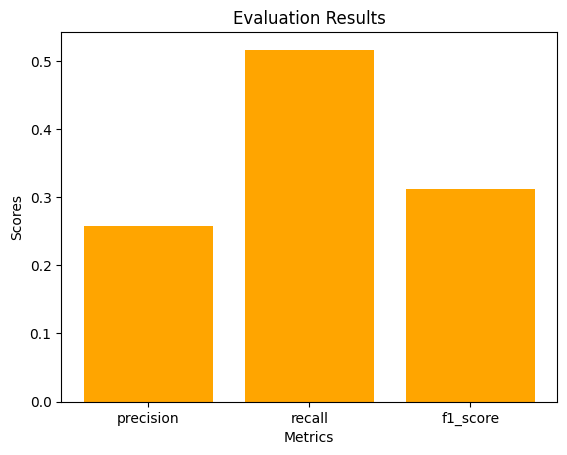

In [41]:
import matplotlib.pyplot as plt

results = {'precision': 0.25789082819723796, 'recall': 0.5167212227219724, 'f1_score': 0.3127440310170613}

# Extract the values
metrics = list(results.keys())
scores = list(results.values())

# Create the bar plot with custom colors
colors = ['orange']  # Define your desired colors
plt.bar(metrics, scores, color=colors)

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Evaluation Results')
plt.show()

In [36]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

def calculate_average_cosine_similarity(medlm_outputs, reference_texts):
    """
    Calculates the average cosine similarity between MedLM outputs and reference texts.

    Args:
        medlm_outputs: A list of MedLM outputs.
        reference_texts: A list of lists, where each inner list contains the reference texts for a corresponding MedLM output.

    Returns:
        The average cosine similarity.
    """

    cosine_similarity_results = []

    for i, medlm_output in enumerate(medlm_outputs):
        refs = reference_texts[i]

        # Calculate cosine similarity for each reference text
        vectorizer = TfidfVectorizer()
        tfidf_matrix = vectorizer.fit_transform([medlm_output] + refs)
        cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1:])
        cosine_similarity_results.append(np.mean(cosine_sim))  # Average across references

    # Calculate the overall average
    average_cosine_similarity = np.mean(cosine_similarity_results)

    return average_cosine_similarity

# Example usage:
reference_texts = [["The medication 'Papain 2.5 % Solution' was used to treat a patient with id 12749568, who was admitted on 2136-11-09"],
                   ["The most frequently prescribed prescription drug is Insulin."],
                   ["The most frequent order types in provider order entries are: 1. Medications with 17690066 entries 2. Lab with 6565578 entries 3. General Care with 5690221 entries 4. ADT orders with 2171456 entries 5. IV therapy with 2140236 entries"],
                   ["The unique names of the tests given to patients who were admitted and the doctor comments VRE isolated are 'R/O VANCOMYCIN RESISTANT ENTEROCOCCUS', 'WOUND CULTURE', and 'FECAL CULTURE - R/O VIBRIO'"],
                   ["The radiology findings of a patient who received ORTHOPAEDICS service in discharge text are: EXAMINATION:  CHEST (PORTABLE AP) INDICATION:  ___ year old woman with urosepsis with fever rule out pneumonia TECHNIQUE:  CHEST (PORTABLE AP) COMPARISON:  ___ IMPRESSION:Left internal jugular line tip is at the level of mid SVC.  Cardiomegaly is substantial, unchanged."],
                   ["The radiology findings for the patient whose Chief Complaint was Abdominal pain in the discharge text were: EXAMINATION:  CT ABD AND PELVIS WITH CONTRAST INDICATION:  ___ with history of feeding tube, purulent drainage from wound site. Difficult venous access.NO_PO contrast Abscess?  G-tube placement? TECHNIQUE:  Single phase contrast: MDCT axial images were acquired through the abdomen and pelvis"],
                   ["The patient with note_id '17829563-RR-2' had a CT HEAD W/O CONTRAST examination where they found 'Routine unenhanced head CT was performed and viewed in brain, intermediate and bone windows.  Coronal and sagittal reformats were also performed. DOSE:  Total DLP (Head) = 903 mGy-cm. COMPARISON: ...'. The patient with note_id '14707889-RR-3' was indicated with 'History of hep C without treatment.  Presenting with abdominal\ndistension.  Question cirrhosis. COMPARISON:  None.FINDINGS:  The liver is shrunken and nodular in appearance consistent with\ncirrhosis.  There is no evidence of intrahepatic biliary duct dilatation."],
                   ["The radiology findings of a patient with a past medical history of coronary artery disease are as follows: There is a mild homogeneous plaque in the proximal internal carotid artery without significant increase in peak systolic velocities. The peak systolic velocity in the common carotid artery is 86 cm/sec."],
                   ["Two patients had allergies to Morphine. Their admission notes include the following information: 1. The first patient has an altered mental status and is in the MEDICINE department. No major surgical or invasive procedure was performed. 2. The second patient was admitted to the UROLOGY department for urinary incontinence. This patient is also allergic to Lipitor and Oxycodone, and no major surgical or invasive procedure was reported. The specific medications on admission for these patients are not provided in the available details."],
                   ["The three most frequent procedures are 'Venous catheterization, not elsewhere classified' with 13928 occurrences, 'Insertion of Infusion Device into Superior Vena Cava, Percutaneous Approach' with 10061 occurrences and 'Other nonoperative respiratory measurements' with 10041 occurrences."]
                   
                  ]
medlm_outputs = [" Papain 2.5% solution is a medication that is used to treat a variety of conditions. It is a proteolytic enzyme, which means that it helps to break down proteins. Papain is derived from the papaya fruit, and it has been used for centuries to treat a variety of medical conditions. Papain 2.5% solution can be used to treat a variety of conditions, including: Wounds: Papain can help to clean and debride wounds, and it can also help to promote healing. Skin conditions: Papain can be used to treat a variety of skin conditions, such as eczema and psoriasis. Digestive problems: Papain can help to improve digestion and relieve symptoms of indigestion, such as heartburn and bloating. Inflammation: Papain can help to reduce inflammation in the body. Papain 2.5% solution is a safe and effective medication that can be used to treat a variety of conditions. It is important to follow the directions on the medication label and to talk to your doctor or pharmacist if you have any questions about papain 2.5% solution.",
                 "Insulin is a hormone that is produced by the pancreas and is essential for the body's use of glucose (sugar) for energy. It is used to treat diabetes, a condition in which the body does not produce enough insulin or does not use insulin effectively. Insulin is available in several different forms, including injectable, oral, and inhaled forms. The type and dose of insulin that is prescribed will depend on the individual's needs.", 
                "The most frequent order types in provider order entries are: \n1. Medications with 17690066 entries \n2. Lab with 6565578 entries \n3. General Care with 5690221 entries \n4. ADT orders with 2171456 entries \n5. IV therapy with 2140236 entries",
                "The doctor's comments indicate that the patient was admitted to the hospital and that the patient was isolated due to a vancomycin-resistant enterococcus (VRE) infection. VRE is a type of bacteria that is resistant to the antibiotic vancomycin. VRE infections can be serious and can be difficult to treat. The doctor's comments also indicate that the patient had a wound culture and a fecal culture performed. A wound culture is a test that is used to identify the bacteria that is causing an infection in a wound. A fecal culture is a test that is used to identify the bacteria that is present in a person's stool. The results of these tests can help the doctor to determine the best course of treatment for the patient.",
                "There is no focal infiltrate, effusion or pneumothorax. The left internal jugular line tip is at the level of mid SVC, which is an appropriate position. The heart is enlarged, but this is unchanged from previous studies. There is no evidence of pneumonia, effusion, or pneumothorax.",
                 "following the administration There is a small amount of free fluid in the right lower quadrant. There is also a small amount of free fluid in the pelvis. There is no evidence of an abscess. The feeding tube is in good position.",
                 "The patient with note_id '17829563-RR-2' had a CT HEAD W/O CONTRAST examination. The report states that 'Routine unenhanced head CT was performed and viewed in brain, intermediate and bone windows. Coronal and sagittal reformats were also performed. DOSE: Total DLP (Head) = 903 mGy-cm.'.\n\nThe patient with note_id '14707889-RR-3' had an ultrasound abdomen examination. The report states that 'History of hep C without treatment. Presenting with abdominal distension. Question cirrhosis. COMPARISON: None.FINDINGS: The liver is shrunken and nodular in appearance consistent with cirrhosis. There is no evidence of intrahepatic biliary duct dilatation.'",
                 "The patient has a mild homogeneous plaque in the proximal internal carotid artery, which is the artery that supplies blood to the brain. This plaque does not appear to be causing any significant obstruction to blood flow, as the peak systolic velocity in the common carotid artery is normal. However, the patient's history of coronary artery disease suggests that they may be at increased risk of developing atherosclerosis, which is the buildup of fatty deposits in the arteries. As such, it is important for the patient to continue to follow a healthy lifestyle and to manage their risk factors for atherosclerosis, such as high blood pressure, high cholesterol, and diabetes. The patient should also continue to undergo regular medical checkups to monitor their cardiovascular health and to receive any necessary treatment.",
                 "There are two patients who have allergies to Morphine. The first patient has an altered mental status and is in the MEDICINE department. No major surgical or invasive procedure was performed. The second patient was admitted to the UROLOGY department for urinary incontinence. This patient is also allergic to Lipitor and Oxycodone, and no major surgical or invasive procedure was reported. The specific medications on admission for these patients are not provided in the available details.",
                 "The three most frequent procedures are 'Venous catheterization, not elsewhere classified' with 13928 occurrences, 'Insertion of Infusion Device into Superior Vena Cava, Percutaneous Approach' with 10061 occurrences and 'Other nonoperative respiratory measurements' with 10041 occurrences.\n\n'Venous catheterization, not elsewhere classified' is the insertion of a catheter into a vein. It is a common procedure that is used for a variety of purposes, such as administering fluids, medications, or blood products, or for collecting blood samples.\n\n'Insertion of Infusion Device into Superior Vena Cava, Percutaneous Approach' is the placement of a catheter into the superior vena cava, a large vein that carries blood from the upper body to the heart. This procedure is often used to administer fluids, medications, or nutrition to patients who are unable to receive them through their veins.\n\n'Other nonoperative respiratory measurements' refers to a variety of tests that are used to assess the function of the lungs. These tests may include spirometry, which measures the amount of air that a person can breathe in and out, and pulse oximetry, which measures the level of oxygen in the blood.\n\nThe frequency of these procedures reflects the fact that they are all common and important medical procedures that are used to diagnose and treat a variety of conditions."
               ]

average_similarity = calculate_average_cosine_similarity(medlm_outputs, reference_texts)
print(f"Average Cosine Similarity: {average_similarity}")


Average Cosine Similarity: 0.5220028358824234


In [39]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction

reference_texts = [["The medication 'Papain 2.5 % Solution' was used to treat a patient with id 12749568, who was admitted on 2136-11-09"],
                   ["The most frequently prescribed prescription drug is Insulin."],
                   ["The most frequent order types in provider order entries are: 1. Medications with 17690066 entries 2. Lab with 6565578 entries 3. General Care with 5690221 entries 4. ADT orders with 2171456 entries 5. IV therapy with 2140236 entries"],
                   ["The unique names of the tests given to patients who were admitted and the doctor comments VRE isolated are 'R/O VANCOMYCIN RESISTANT ENTEROCOCCUS', 'WOUND CULTURE', and 'FECAL CULTURE - R/O VIBRIO'"],
                   ["The radiology findings of a patient who received ORTHOPAEDICS service in discharge text are: EXAMINATION:  CHEST (PORTABLE AP) INDICATION:  ___ year old woman with urosepsis with fever rule out pneumonia TECHNIQUE:  CHEST (PORTABLE AP) COMPARISON:  ___ IMPRESSION:Left internal jugular line tip is at the level of mid SVC.  Cardiomegaly is substantial, unchanged."],
                   ["The radiology findings for the patient whose Chief Complaint was Abdominal pain in the discharge text were: EXAMINATION:  CT ABD AND PELVIS WITH CONTRAST INDICATION:  ___ with history of feeding tube, purulent drainage from wound site. Difficult venous access.NO_PO contrast Abscess?  G-tube placement? TECHNIQUE:  Single phase contrast: MDCT axial images were acquired through the abdomen and pelvis"],
                   ["The patient with note_id '17829563-RR-2' had a CT HEAD W/O CONTRAST examination where they found 'Routine unenhanced head CT was performed and viewed in brain, intermediate and bone windows.  Coronal and sagittal reformats were also performed. DOSE:  Total DLP (Head) = 903 mGy-cm. COMPARISON: ...'. The patient with note_id '14707889-RR-3' was indicated with 'History of hep C without treatment.  Presenting with abdominal\ndistension.  Question cirrhosis. COMPARISON:  None.FINDINGS:  The liver is shrunken and nodular in appearance consistent with\ncirrhosis.  There is no evidence of intrahepatic biliary duct dilatation."],
                   ["The radiology findings of a patient with a past medical history of coronary artery disease are as follows: There is a mild homogeneous plaque in the proximal internal carotid artery without significant increase in peak systolic velocities. The peak systolic velocity in the common carotid artery is 86 cm/sec."],
                   ["Two patients had allergies to Morphine. Their admission notes include the following information: 1. The first patient has an altered mental status and is in the MEDICINE department. No major surgical or invasive procedure was performed. 2. The second patient was admitted to the UROLOGY department for urinary incontinence. This patient is also allergic to Lipitor and Oxycodone, and no major surgical or invasive procedure was reported. The specific medications on admission for these patients are not provided in the available details."],
                   ["The three most frequent procedures are 'Venous catheterization, not elsewhere classified' with 13928 occurrences, 'Insertion of Infusion Device into Superior Vena Cava, Percutaneous Approach' with 10061 occurrences and 'Other nonoperative respiratory measurements' with 10041 occurrences."]
                   
                  ]
medlm_outputs = [" Papain 2.5% solution is a medication that is used to treat a variety of conditions. It is a proteolytic enzyme, which means that it helps to break down proteins. Papain is derived from the papaya fruit, and it has been used for centuries to treat a variety of medical conditions. Papain 2.5% solution can be used to treat a variety of conditions, including: Wounds: Papain can help to clean and debride wounds, and it can also help to promote healing. Skin conditions: Papain can be used to treat a variety of skin conditions, such as eczema and psoriasis. Digestive problems: Papain can help to improve digestion and relieve symptoms of indigestion, such as heartburn and bloating. Inflammation: Papain can help to reduce inflammation in the body. Papain 2.5% solution is a safe and effective medication that can be used to treat a variety of conditions. It is important to follow the directions on the medication label and to talk to your doctor or pharmacist if you have any questions about papain 2.5% solution.",
                 "Insulin is a hormone that is produced by the pancreas and is essential for the body's use of glucose (sugar) for energy. It is used to treat diabetes, a condition in which the body does not produce enough insulin or does not use insulin effectively. Insulin is available in several different forms, including injectable, oral, and inhaled forms. The type and dose of insulin that is prescribed will depend on the individual's needs.", 
                "The most frequent order types in provider order entries are: \n1. Medications with 17690066 entries \n2. Lab with 6565578 entries \n3. General Care with 5690221 entries \n4. ADT orders with 2171456 entries \n5. IV therapy with 2140236 entries",
                "The doctor's comments indicate that the patient was admitted to the hospital and that the patient was isolated due to a vancomycin-resistant enterococcus (VRE) infection. VRE is a type of bacteria that is resistant to the antibiotic vancomycin. VRE infections can be serious and can be difficult to treat. The doctor's comments also indicate that the patient had a wound culture and a fecal culture performed. A wound culture is a test that is used to identify the bacteria that is causing an infection in a wound. A fecal culture is a test that is used to identify the bacteria that is present in a person's stool. The results of these tests can help the doctor to determine the best course of treatment for the patient.",
                "There is no focal infiltrate, effusion or pneumothorax. The left internal jugular line tip is at the level of mid SVC, which is an appropriate position. The heart is enlarged, but this is unchanged from previous studies. There is no evidence of pneumonia, effusion, or pneumothorax.",
                 "following the administration There is a small amount of free fluid in the right lower quadrant. There is also a small amount of free fluid in the pelvis. There is no evidence of an abscess. The feeding tube is in good position.",
                 "The patient with note_id '17829563-RR-2' had a CT HEAD W/O CONTRAST examination. The report states that 'Routine unenhanced head CT was performed and viewed in brain, intermediate and bone windows. Coronal and sagittal reformats were also performed. DOSE: Total DLP (Head) = 903 mGy-cm.'.\n\nThe patient with note_id '14707889-RR-3' had an ultrasound abdomen examination. The report states that 'History of hep C without treatment. Presenting with abdominal distension. Question cirrhosis. COMPARISON: None.FINDINGS: The liver is shrunken and nodular in appearance consistent with cirrhosis. There is no evidence of intrahepatic biliary duct dilatation.'",
                 "The patient has a mild homogeneous plaque in the proximal internal carotid artery, which is the artery that supplies blood to the brain. This plaque does not appear to be causing any significant obstruction to blood flow, as the peak systolic velocity in the common carotid artery is normal. However, the patient's history of coronary artery disease suggests that they may be at increased risk of developing atherosclerosis, which is the buildup of fatty deposits in the arteries. As such, it is important for the patient to continue to follow a healthy lifestyle and to manage their risk factors for atherosclerosis, such as high blood pressure, high cholesterol, and diabetes. The patient should also continue to undergo regular medical checkups to monitor their cardiovascular health and to receive any necessary treatment.",
                 "There are two patients who have allergies to Morphine. The first patient has an altered mental status and is in the MEDICINE department. No major surgical or invasive procedure was performed. The second patient was admitted to the UROLOGY department for urinary incontinence. This patient is also allergic to Lipitor and Oxycodone, and no major surgical or invasive procedure was reported. The specific medications on admission for these patients are not provided in the available details.",
                 "The three most frequent procedures are 'Venous catheterization, not elsewhere classified' with 13928 occurrences, 'Insertion of Infusion Device into Superior Vena Cava, Percutaneous Approach' with 10061 occurrences and 'Other nonoperative respiratory measurements' with 10041 occurrences.\n\n'Venous catheterization, not elsewhere classified' is the insertion of a catheter into a vein. It is a common procedure that is used for a variety of purposes, such as administering fluids, medications, or blood products, or for collecting blood samples.\n\n'Insertion of Infusion Device into Superior Vena Cava, Percutaneous Approach' is the placement of a catheter into the superior vena cava, a large vein that carries blood from the upper body to the heart. This procedure is often used to administer fluids, medications, or nutrition to patients who are unable to receive them through their veins.\n\n'Other nonoperative respiratory measurements' refers to a variety of tests that are used to assess the function of the lungs. These tests may include spirometry, which measures the amount of air that a person can breathe in and out, and pulse oximetry, which measures the level of oxygen in the blood.\n\nThe frequency of these procedures reflects the fact that they are all common and important medical procedures that are used to diagnose and treat a variety of conditions."
               ]
# Calculate BLEU score
smoothie = SmoothingFunction().method4
bleu_score = sentence_bleu(reference_texts, medlm_output, smoothing_function=smoothie)

print(f"BLEU Score: {bleu_score}")

BLEU Score: 0


# Conclusion
 - BLEU and ROUGE are primarily focused on surface-level similarity. They might not capture nuances like coherence, fluency, or the overall quality of the generated text.
 - There will always be some degree of subjectivity in assigning keyword weights, so it's important to involve experts and consider multiple perspectives.

# Recommendation/ Cautious
- Overfitting: Be careful not to overemphasize keywords, as it can lead to unnatural or repetitive outputs.
- Model Complexity: Fine-tuning a large model like MedLM can be computationally expensive and require significant expertise.

Notes:
- 1. candidateCount
What it does: This parameter determines how many different response candidates the model will generate for a single prompt.
Impact: A higher candidateCount means you'll get more diverse responses, potentially offering different perspectives or approaches to the same question. This is helpful when you want to explore multiple possibilities.
- 2. maxOutputTokens
What it does: This parameter sets the maximum number of tokens the model can generate in a single response. Remember, a token is roughly equivalent to 4 characters.
Impact: A higher maxOutputTokens allows for longer, more detailed responses. A lower value will result in shorter, more concise answers.
- 3. temperature
What it does: This parameter controls the randomness of the model's output.
Impact:
Low temperature (closer to 0): The model will produce more deterministic, predictable responses. It's likely to stick to the most probable words and phrases.
High temperature (closer to 1): The model will be more creative and unpredictable. It might explore less common words or phrases, leading to more diverse and potentially surprising outputs.
- 4. topP
What it does: This parameter, along with topK , influences how the model selects the next token to generate. It focuses on the probability distribution of possible tokens.
Impact:
Lower topP (closer to 0): The model will only consider a small subset of the most probable tokens, leading to more focused and predictable responses.
Higher topP (closer to 1): The model will consider a wider range of tokens, potentially leading to more creative and diverse outputs.
- 5. topK
What it does: This parameter, along with topP , influences how the model selects the next token to generate. It focuses on the number of most probable tokens to consider.
Impact:
Lower topK (closer to 1): The model will only consider the single most probable token, resulting in a deterministic and predictable response (also known as "greedy decoding").
Higher topK (closer to 40): The model will consider a larger number of the most probable tokens, potentially leading to more creative and diverse outputs.

-- candidateCount controls the number of responses.

-- maxOutputTokens controls the length of responses.

-- temperature controls the randomness of responses.

-- topP and topK work together to control the diversity of responses by focusing on the probability distribution of possible tokens.

Example
Imagine you're asking MedLM to write a poem.
candidateCount is like asking for multiple drafts of the poem.
maxOutputTokens is like setting a word limit for the poem.
temperature is like adjusting the poet's creativity level (more or less adventurous).
topP and topK are like giving the poet a set of rhyming dictionaries with different levels of complexity.